# 3. Bias Correction Model

In [66]:
import os
import pandas as pd
import geopandas as gpd
import h3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [67]:
import pandas as pd

# Path for data loading
data_path = '../processed_data/matched_weekly_strava_ecocounter_extended.csv'

# Load the file
df = pd.read_csv(data_path, parse_dates=['week_start'])

# Preview
print(df.head())

  GRID_ID.1 STARTweek_stravaDATE_cast GRID_ID ENDweek_stravaDATE_cast  \
0     BD-17                2022-10-17   BD-17     2022-10-23 23:59:00   
1     BD-17                2020-10-05   BD-17     2020-10-11 23:59:00   
2     BE-15                2022-04-11   BE-15     2022-04-17 23:59:00   
3     BH-26                2020-12-21   BH-26     2020-12-27 23:59:00   
4     BQ-25                2020-08-17   BQ-25     2020-08-23 23:59:00   

   SUM_total_trip_count  EcoCntr_weekly_SUM  MAX_slopePct STARTweek_Time  \
0                2765.0                1181           NaN     2022-10-17   
1                3050.0                1837           NaN     2020-10-05   
2               20680.0                3440           NaN     2022-04-11   
3                2820.0                 668           NaN     2020-12-21   
4                8965.0                   0           NaN     2020-08-17   

  HEXid_weekID HEXid_WeekID         ENDweek_Time    week_id week_start  
0    BD-17_198    BD-17_198  20

In [68]:
df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'eco_count'
}, inplace=True)

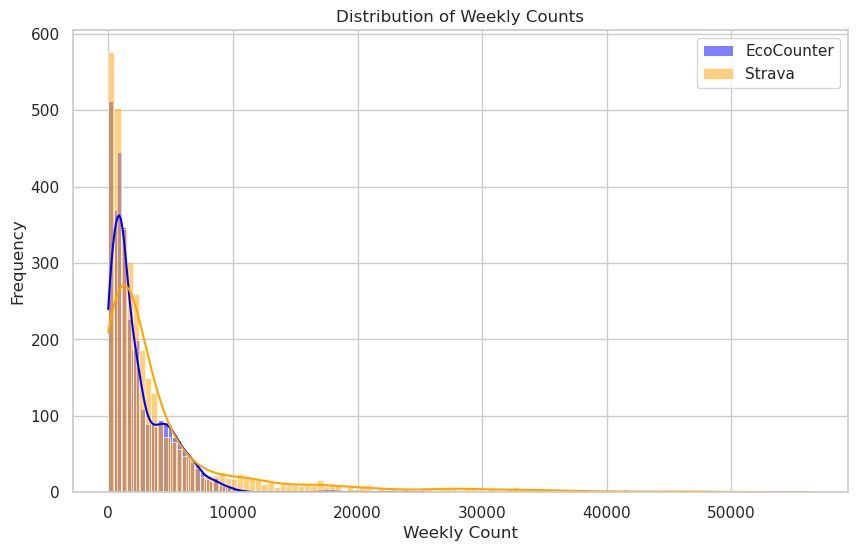

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['eco_count'], kde=True, color='blue', label='EcoCounter')
sns.histplot(df['strava_count'], kde=True, color='orange', label='Strava')
plt.title('Distribution of Weekly Counts')
plt.xlabel('Weekly Count')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

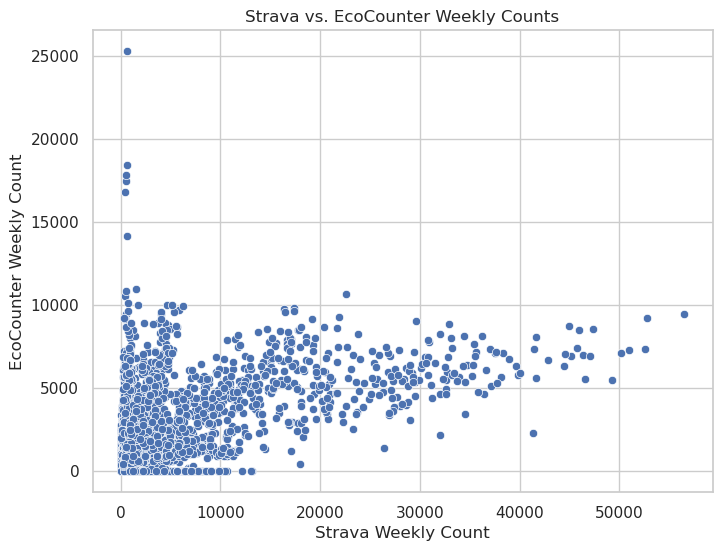

📌 Correlation between Strava and EcoCounter counts: 0.49


In [70]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='strava_count', y='eco_count')
plt.title('Strava vs. EcoCounter Weekly Counts')
plt.xlabel('Strava Weekly Count')
plt.ylabel('EcoCounter Weekly Count')
plt.grid(True)
plt.show()

correlation = df[['strava_count', 'eco_count']].corr().iloc[0, 1]
print(f"📌 Correlation between Strava and EcoCounter counts: {correlation:.2f}")

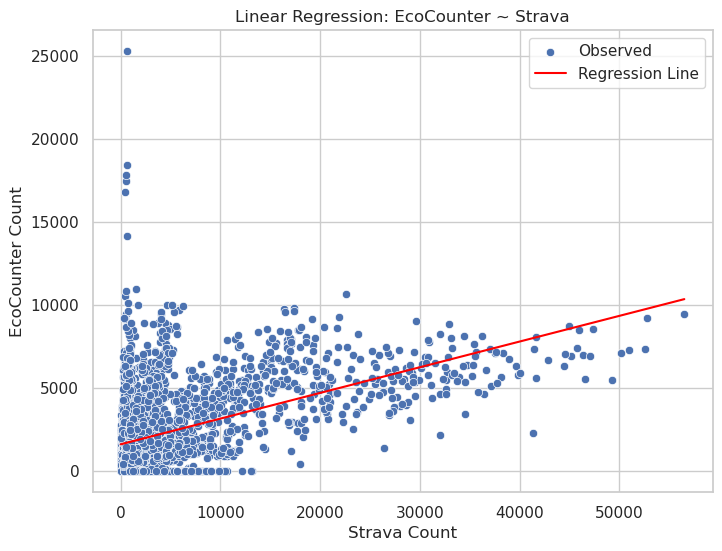

📉 RMSE: 1998.91


In [71]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Drop rows with missing values
df_model = df[['strava_count', 'eco_count']].dropna()

X = df_model[['strava_count']]
y = df_model['eco_count']

model = LinearRegression()
model.fit(X, y)
df_model['eco_pred'] = model.predict(X)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='strava_count', y='eco_count', data=df_model, label='Observed')
sns.lineplot(x='strava_count', y='eco_pred', data=df_model, color='red', label='Regression Line')
plt.title('Linear Regression: EcoCounter ~ Strava')
plt.xlabel('Strava Count')
plt.ylabel('EcoCounter Count')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y, df_model['eco_pred']))
print(f"📉 RMSE: {rmse:.2f}")

In [73]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

🔍 Sample rows:
    strava_count  ecocounter_count  total_count
0        2765.0              1181       3946.0
1        3050.0              1837       4887.0
2       20680.0              3440      24120.0
3        2820.0               668       3488.0
4        8965.0                 0       8965.0

📊 Summary Statistics:
       strava_count  ecocounter_count   total_count
count   3377.000000       3377.000000   3377.000000
mean    4472.807225       2312.891916   6785.699141
std     7220.435452       2289.639433   8572.885223
min        5.000000          0.000000      5.000000
25%      710.000000        698.000000   1955.000000
50%     1910.000000       1487.000000   3890.000000
75%     4405.000000       3481.000000   7487.000000
max    56525.000000      25277.000000  65973.000000

📈 Correlation Matrix:
                  strava_count  ecocounter_count  total_count
strava_count          1.000000          0.487450     0.972429
ecocounter_count      0.487450          1.000000     0.677629
to

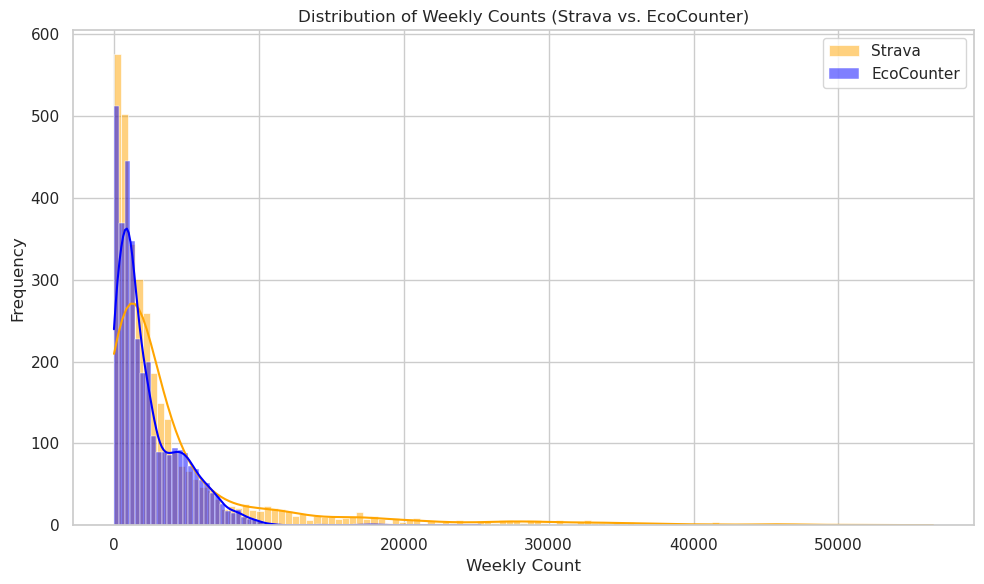

In [74]:
# 📦 Imports
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Display settings (optional)
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# 📁 Load the processed data (corrected path)
merged_path = '../processed_data/weekly_with_covariates.csv'
assert os.path.exists(merged_path), f"Missing file: {merged_path}"

# 📄 Read the CSV
df = pd.read_csv(merged_path, parse_dates=['week_start'])

# ✅ Rename key columns for consistency
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})

# ✅ Create total weekly count
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# 🔍 Preview data
print("🔍 Sample rows:\n", df[['strava_count', 'ecocounter_count', 'total_count']].head())

# 📊 Summary statistics
print("\n📊 Summary Statistics:")
print(df[['strava_count', 'ecocounter_count', 'total_count']].describe())

# 📈 Correlation matrix
print("\n📈 Correlation Matrix:")
print(df[['strava_count', 'ecocounter_count', 'total_count']].corr())

# 📉 Histogram of weekly counts
plt.figure(figsize=(10, 6))
sns.histplot(df['strava_count'], color='orange', label='Strava', kde=True)
sns.histplot(df['ecocounter_count'], color='blue', label='EcoCounter', kde=True)
plt.title("Distribution of Weekly Counts (Strava vs. EcoCounter)")
plt.xlabel("Weekly Count")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

🧭 Found covariates: ['MAX_slopePct', 'Minority LandClass Pct', '2024 Median Household Income', '2024 Diversity Index']

📈 Covariate correlations with counts:
                              strava_count  ecocounter_count  total_count
MAX_slopePct                           NaN               NaN          NaN
Minority LandClass Pct           -0.179559         -0.174691    -0.197889
2024 Median Household Income      0.132678         -0.151739     0.071221
2024 Diversity Index             -0.343600         -0.145807    -0.328336


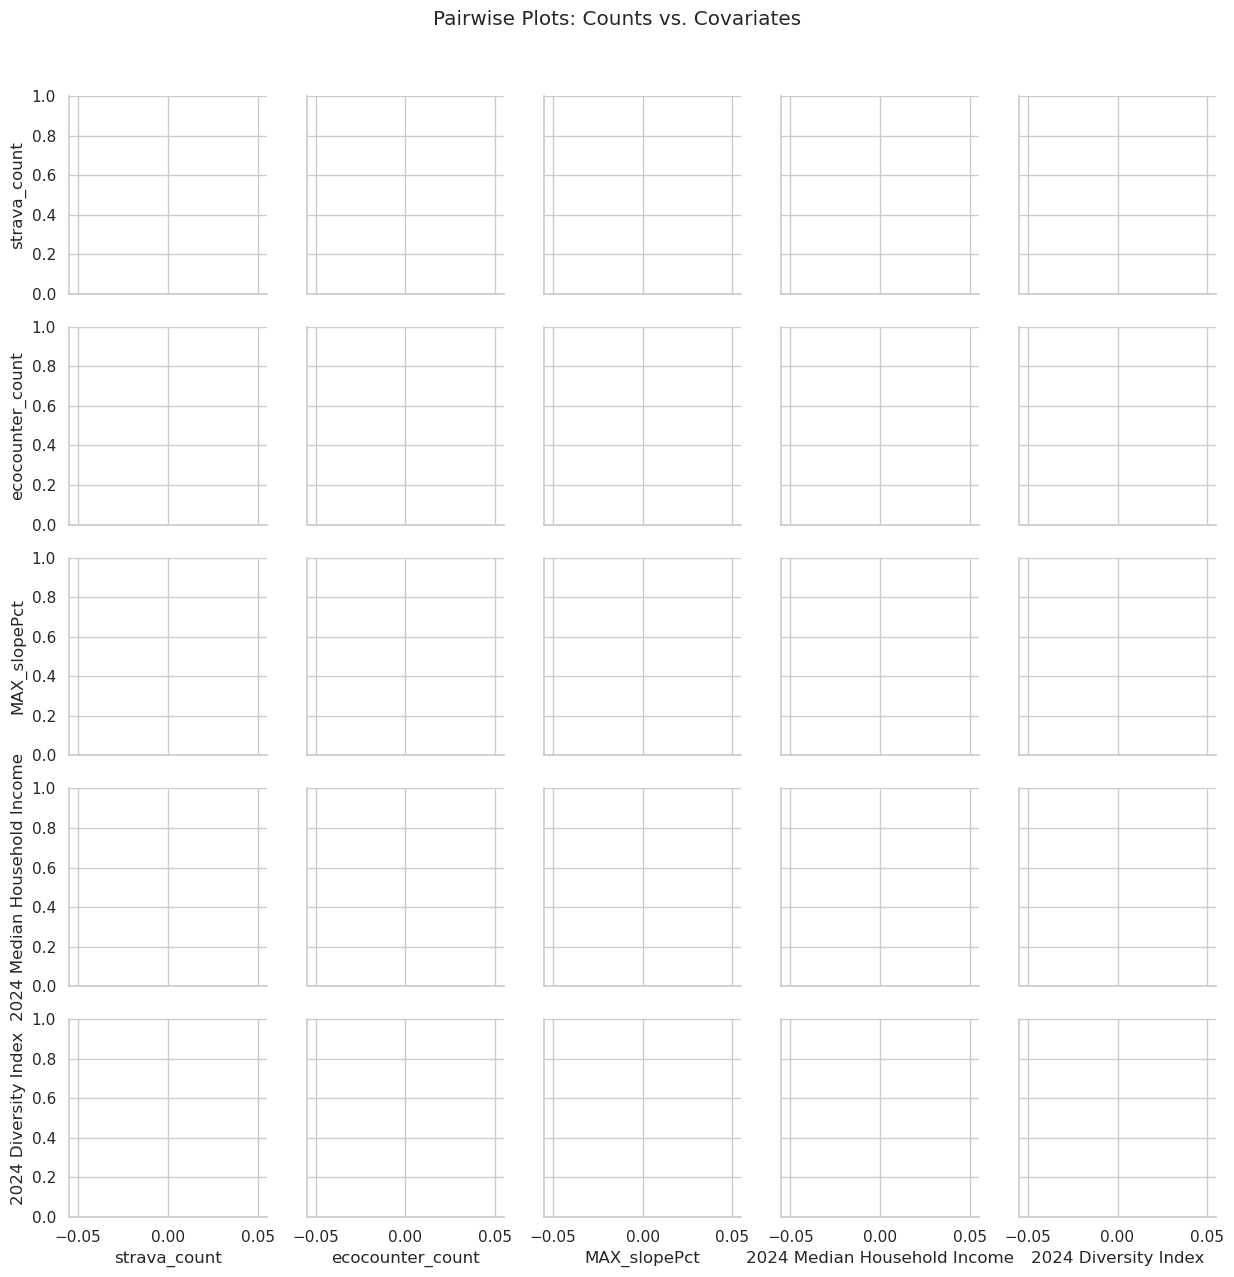

In [75]:
# 📊 Analyze covariates and their influence

# ✅ Select covariate columns if present
possible_covariates = ['MAX_slopePct', 'Minority LandClass Pct', '2024 Median Household Income', '2024 Diversity Index']
existing_covariates = [col for col in possible_covariates if col in df.columns]

print(f"🧭 Found covariates: {existing_covariates}")

# 💡 Correlate covariates with counts
correlation_df = df[['strava_count', 'ecocounter_count', 'total_count'] + existing_covariates].corr()

# 📌 Show correlations between covariates and counts
print("\n📈 Covariate correlations with counts:")
print(correlation_df[['strava_count', 'ecocounter_count', 'total_count']].loc[existing_covariates])

# 📊 Pairplot (optional but insightful)
sns.pairplot(df[['strava_count', 'ecocounter_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']].dropna())
plt.suptitle("Pairwise Plots: Counts vs. Covariates", y=1.02)
plt.tight_layout()
plt.show()

Plot rows: 3377


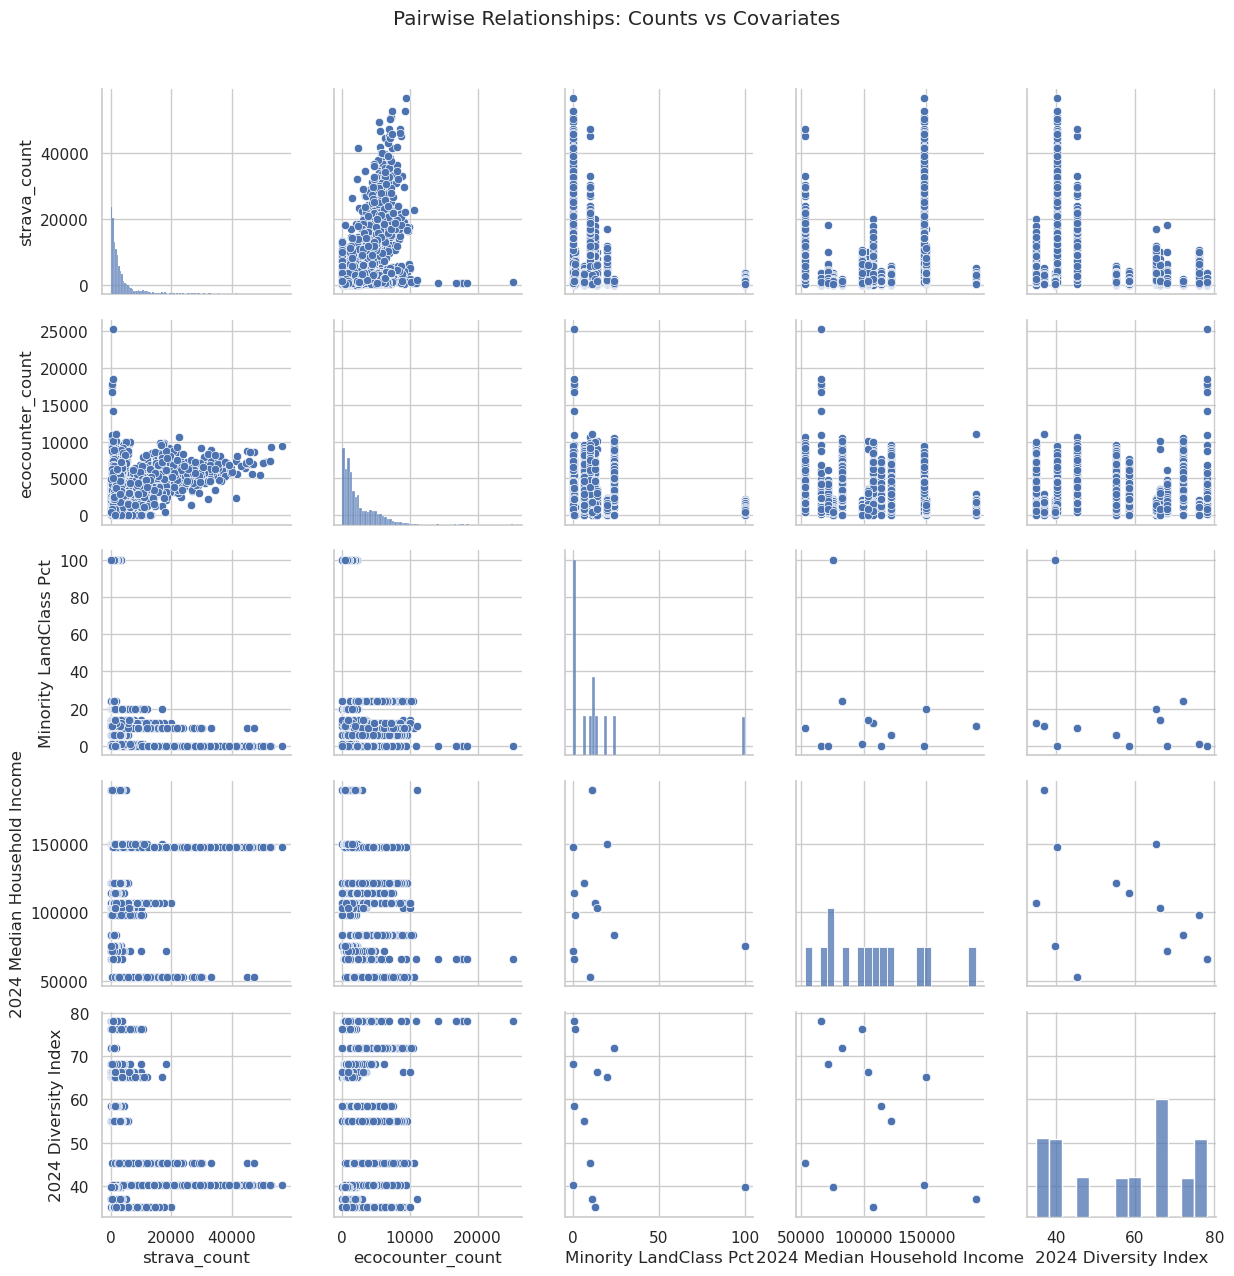

In [76]:
# 📉 Remove NaN-only columns before plotting
plot_cols = ['strava_count', 'ecocounter_count', 'Minority LandClass Pct', '2024 Median Household Income', '2024 Diversity Index']
plot_df = df[plot_cols].dropna()

# 🔁 Confirm it's not empty
print(f"Plot rows: {len(plot_df)}")

if len(plot_df) > 0:
    sns.pairplot(plot_df)
    plt.suptitle("Pairwise Relationships: Counts vs Covariates", y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("❌ No data to plot — check for missing values in key covariates.")

In [79]:
import pandas as pd
import os

# Corrected file path (go up one level from /notebooks/)
data_path = '../processed_data/weekly_with_covariates.csv'

# Confirm it exists before loading
assert os.path.exists(data_path), f"Missing file: {data_path}"

# Load the CSV file
df = pd.read_csv(data_path, parse_dates=['week_start'])

# ✅ Preview
print("✅ File loaded successfully.")
print(df.head())

✅ File loaded successfully.
  GRID_ID.1 STARTweek_stravaDATE_cast GRID_ID ENDweek_stravaDATE_cast  \
0     BD-17                2022-10-17   BD-17     2022-10-23 23:59:00   
1     BD-17                2020-10-05   BD-17     2020-10-11 23:59:00   
2     BE-15                2022-04-11   BE-15     2022-04-17 23:59:00   
3     BH-26                2020-12-21   BH-26     2020-12-27 23:59:00   
4     BQ-25                2020-08-17   BQ-25     2020-08-23 23:59:00   

   SUM_total_trip_count  EcoCntr_weekly_SUM  MAX_slopePct STARTweek_Time  \
0                2765.0                1181           NaN     2022-10-17   
1                3050.0                1837           NaN     2020-10-05   
2               20680.0                3440           NaN     2022-04-11   
3                2820.0                 668           NaN     2020-12-21   
4                8965.0                   0           NaN     2020-08-17   

  HEXid_weekID HEXid_WeekID         ENDweek_Time    week_id week_start  \
0 

🔍 Sample rows:
   strava_count  ecocounter_count  total_count
0        2765.0              1181       3946.0
1        3050.0              1837       4887.0
2       20680.0              3440      24120.0
3        2820.0               668       3488.0
4        8965.0                 0       8965.0

📊 Summary Statistics:
       strava_count  ecocounter_count   total_count
count   3377.000000       3377.000000   3377.000000
mean    4472.807225       2312.891916   6785.699141
std     7220.435452       2289.639433   8572.885223
min        5.000000          0.000000      5.000000
25%      710.000000        698.000000   1955.000000
50%     1910.000000       1487.000000   3890.000000
75%     4405.000000       3481.000000   7487.000000
max    56525.000000      25277.000000  65973.000000

📈 Correlation Matrix:
                  strava_count  ecocounter_count  total_count
strava_count          1.000000          0.487450     0.972429
ecocounter_count      0.487450          1.000000     0.677629
tot

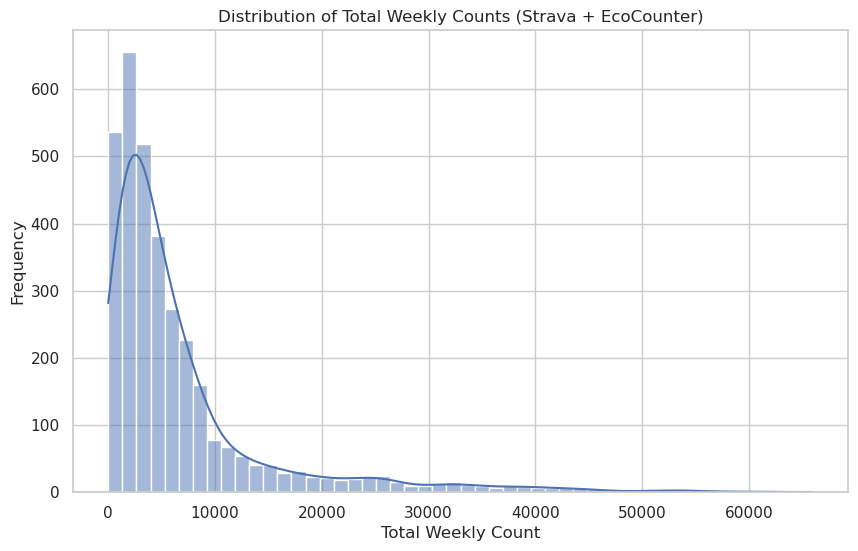


🧭 Found covariates: ['MAX_slopePct', 'Minority LandClass Pct', '2024 Median Household Income', '2024 Diversity Index']

📈 Covariate correlations with counts:
                              strava_count  ecocounter_count  total_count
MAX_slopePct                           NaN               NaN          NaN
Minority LandClass Pct           -0.179559         -0.174691    -0.197889
2024 Median Household Income      0.132678         -0.151739     0.071221
2024 Diversity Index             -0.343600         -0.145807    -0.328336


/tmp/ipykernel_339/1972573058.py:67: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


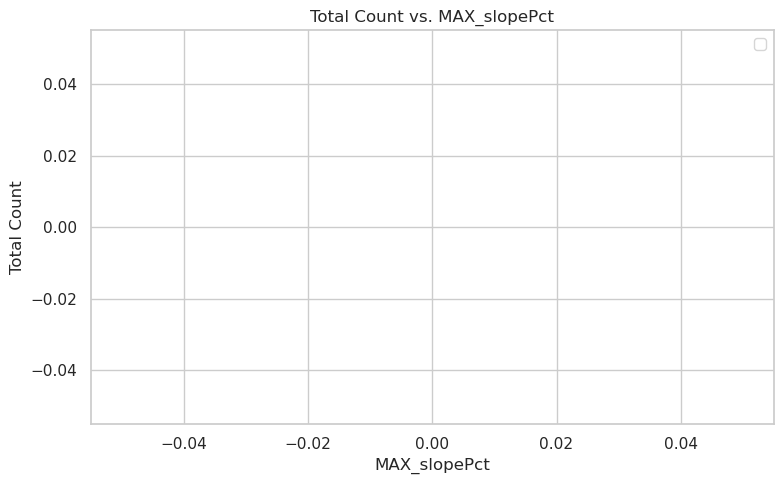

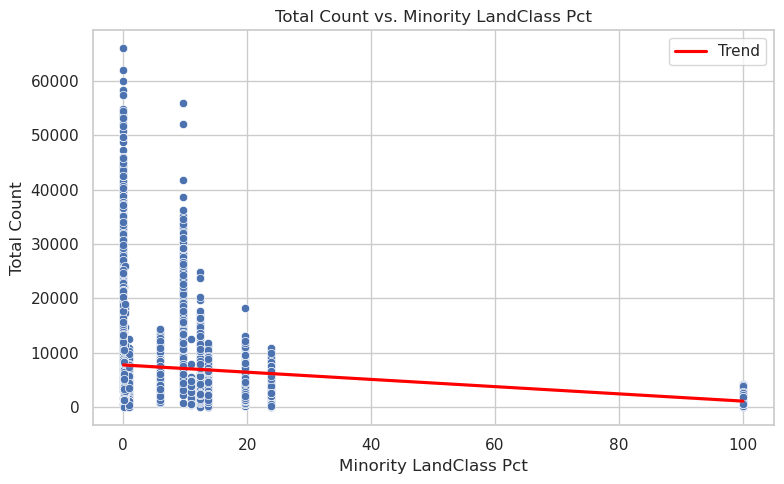

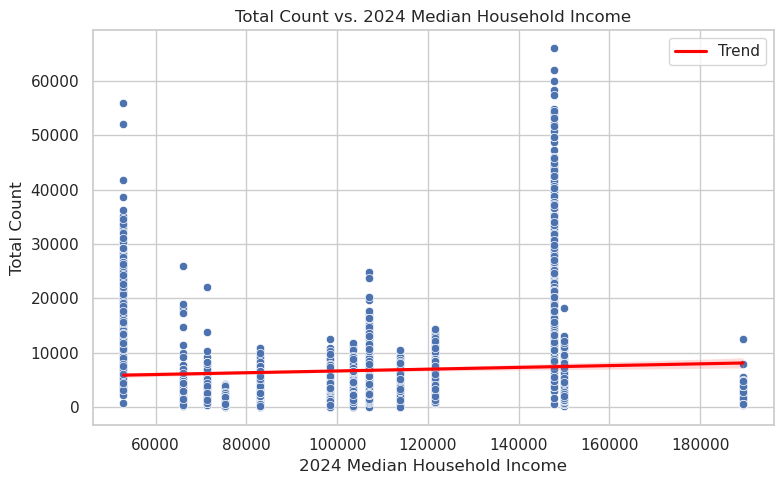

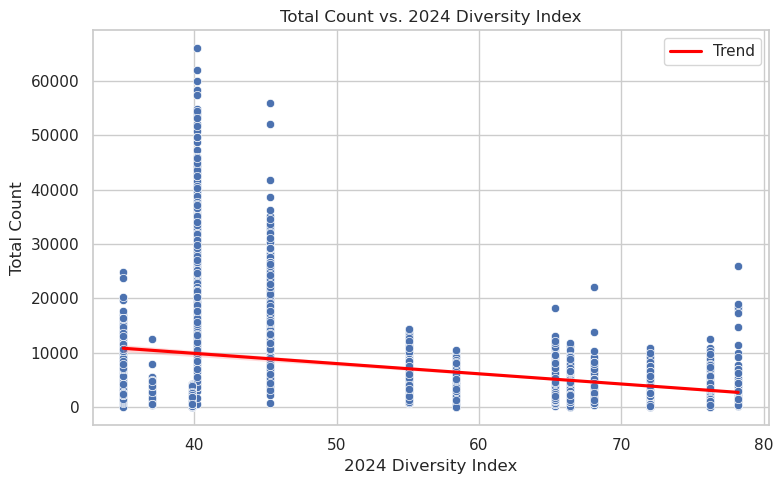

In [80]:
# 📦 Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Set up plotting
sns.set(style="whitegrid")

# --- 📁 Load Data ---
data_path = "/home/jovyan/BiasCorrectionCrowdsourcedData-cookbook/processed_data/weekly_with_covariates.csv"
df = pd.read_csv(data_path, parse_dates=["week_start"])

# ✅ Rename for consistency
df = df.rename(columns={
    "SUM_total_trip_count": "strava_count",
    "EcoCntr_weekly_SUM": "ecocounter_count"
})
df["total_count"] = df["strava_count"] + df["ecocounter_count"]

# 🧭 Check a sample
print("🔍 Sample rows:")
print(df[["strava_count", "ecocounter_count", "total_count"]].head())

# 📊 Summary stats
print("\n📊 Summary Statistics:")
print(df[["strava_count", "ecocounter_count", "total_count"]].describe())

# 📈 Correlation matrix
print("\n📈 Correlation Matrix:")
print(df[["strava_count", "ecocounter_count", "total_count"]].corr())

# --- 📉 Visualize Distributions ---
plt.figure(figsize=(10, 6))
sns.histplot(df["total_count"], bins=50, kde=True)
plt.title("Distribution of Total Weekly Counts (Strava + EcoCounter)")
plt.xlabel("Total Weekly Count")
plt.ylabel("Frequency")
plt.show()

# --- 🎯 Covariate Analysis ---
covariate_cols = [
    "MAX_slopePct",
    "Minority LandClass Pct",
    "2024 Median Household Income",
    "2024 Diversity Index"
]

# Filter to existing columns
covariate_cols = [col for col in covariate_cols if col in df.columns]

print("\n🧭 Found covariates:", covariate_cols)

# Correlation with counts
correlation_results = df[["strava_count", "ecocounter_count", "total_count"] + covariate_cols].corr()
print("\n📈 Covariate correlations with counts:")
print(correlation_results.loc[covariate_cols, ["strava_count", "ecocounter_count", "total_count"]])

# --- 📊 Visualize Covariates vs. Count ---
for cov in covariate_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[cov], y=df["total_count"])
    sns.regplot(x=df[cov], y=df["total_count"], scatter=False, color='red', label='Trend')
    plt.title(f"Total Count vs. {cov}")
    plt.xlabel(cov)
    plt.ylabel("Total Count")
    plt.legend()
    plt.tight_layout()
    plt.show()


🔍 Sample rows:
   strava_count  ecocounter_count  total_count
0        2765.0              1181       3946.0
1        3050.0              1837       4887.0
2       20680.0              3440      24120.0
3        2820.0               668       3488.0
4        8965.0                 0       8965.0

📊 Summary Statistics:
       strava_count  ecocounter_count   total_count
count   3377.000000       3377.000000   3377.000000
mean    4472.807225       2312.891916   6785.699141
std     7220.435452       2289.639433   8572.885223
min        5.000000          0.000000      5.000000
25%      710.000000        698.000000   1955.000000
50%     1910.000000       1487.000000   3890.000000
75%     4405.000000       3481.000000   7487.000000
max    56525.000000      25277.000000  65973.000000

📈 Correlation Matrix:
                  strava_count  ecocounter_count  total_count
strava_count          1.000000          0.487450     0.972429
ecocounter_count      0.487450          1.000000     0.677629
to

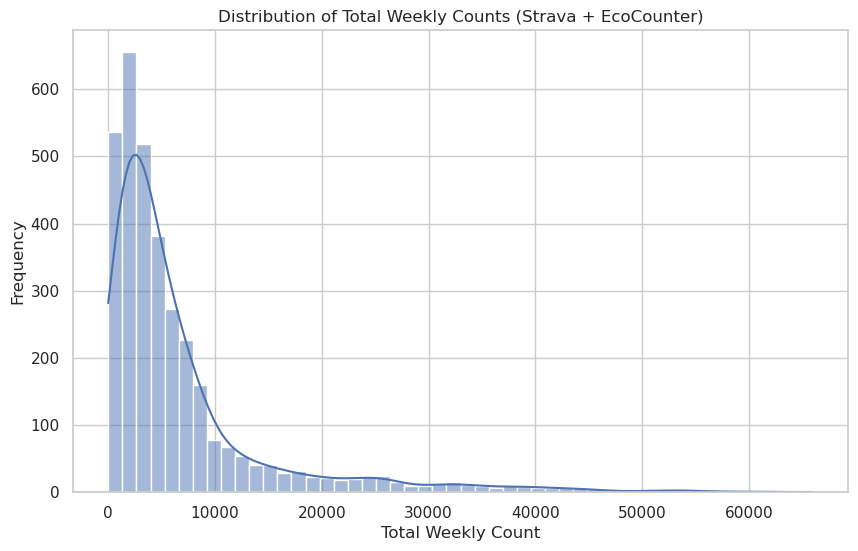


🧭 Found covariates: ['MAX_slopePct', 'Minority LandClass Pct', '2024 Median Household Income', '2024 Diversity Index']

📈 Covariate correlations with counts:
                              strava_count  ecocounter_count  total_count
MAX_slopePct                           NaN               NaN          NaN
Minority LandClass Pct           -0.179559         -0.174691    -0.197889
2024 Median Household Income      0.132678         -0.151739     0.071221
2024 Diversity Index             -0.343600         -0.145807    -0.328336


/tmp/ipykernel_339/641476720.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


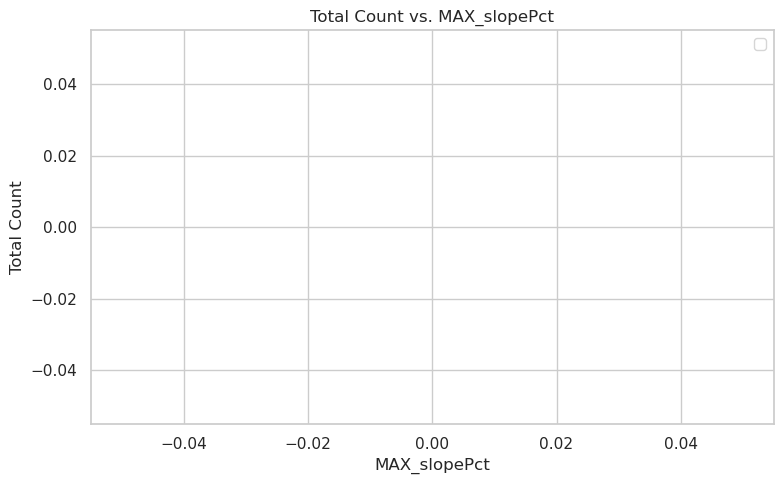

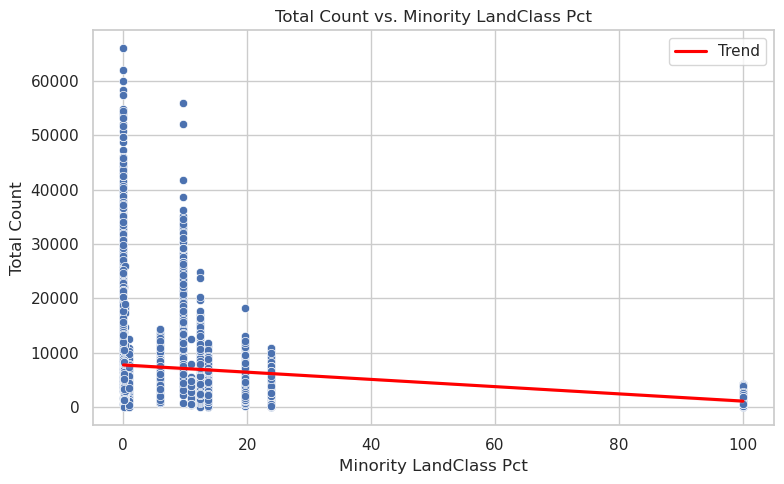

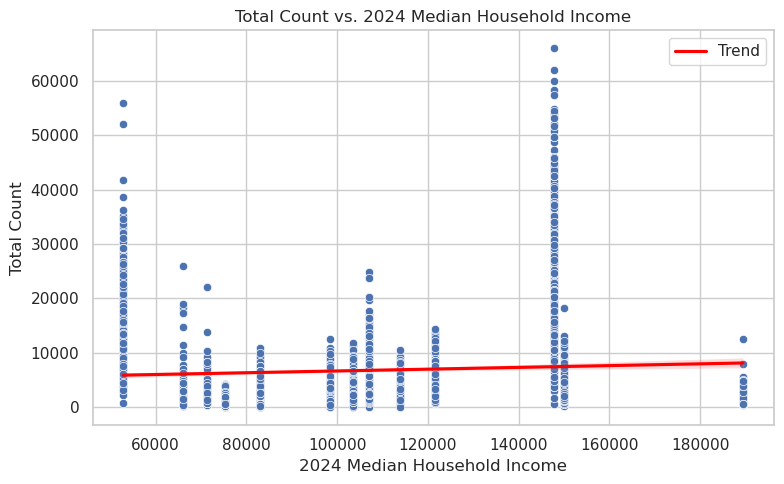

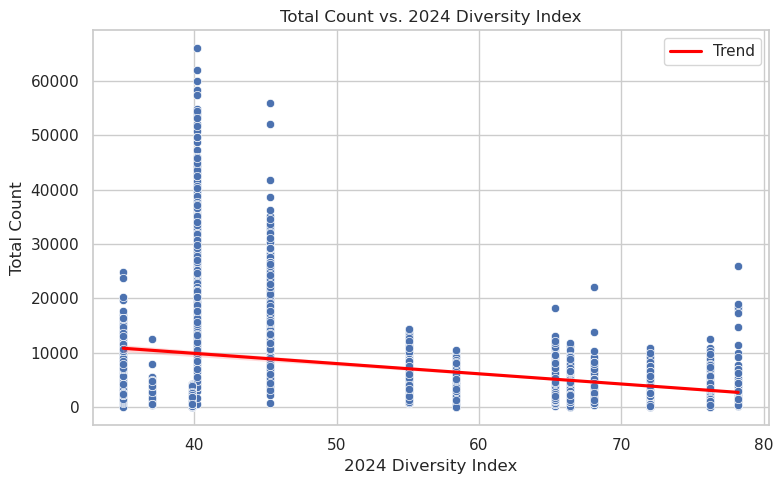

/tmp/ipykernel_339/641476720.py:84: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


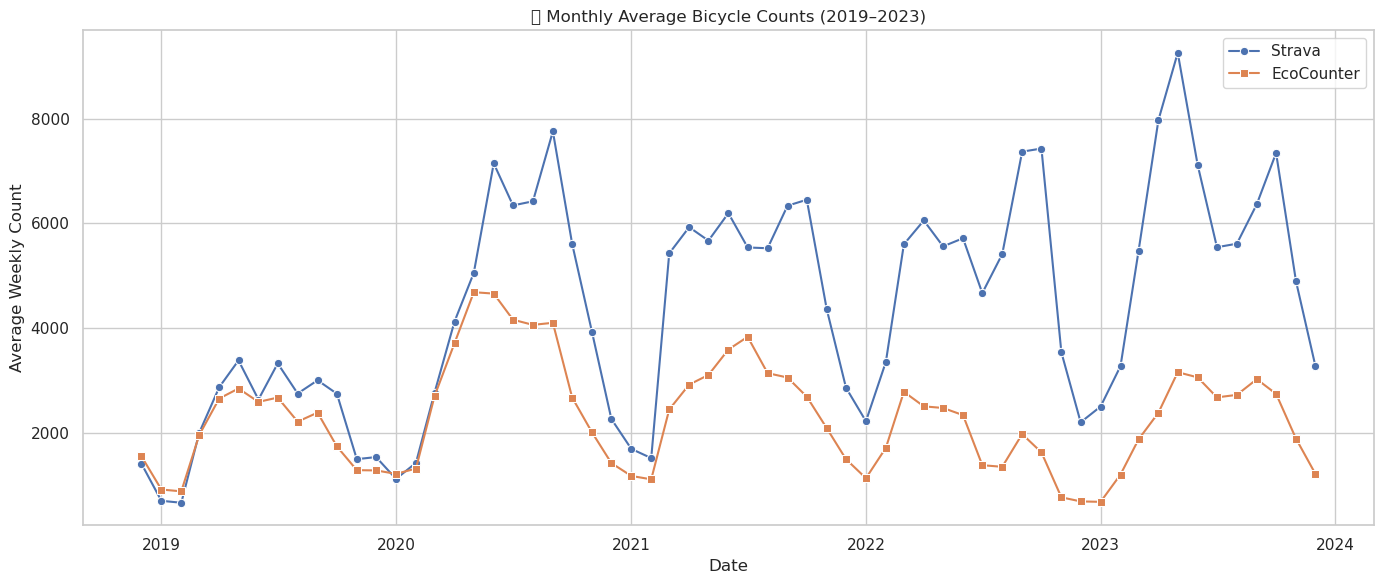


🌍 Top 10 Grid Cells by Average Total Count:
   GRID_ID  strava_count  ecocounter_count         total
3    BE-15  21827.107280       4473.061303  26300.168582
4    BE-19  12199.961686       5163.720307  17363.681992
0    BC-12   4541.168582       2378.574713   6919.743295
8    BK-32   2171.447876       3463.795367   5635.243243
6    BH-26   4264.346154        899.238462   5163.584615
12   BT-26    544.169884       4009.370656   4553.540541
5    BH-24   2027.269231       2046.046154   4073.315385
11   BQ-25   3465.603113        482.642023   3948.245136
7    BI-29   1313.275862       2194.727969   3508.003831
9    BL-36   2419.904215       1068.582375   3488.486590


In [81]:
# 📦 Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Set up plotting
sns.set(style="whitegrid")

# --- 📁 Load Data ---
data_path = "/home/jovyan/BiasCorrectionCrowdsourcedData-cookbook/processed_data/weekly_with_covariates.csv"
df = pd.read_csv(data_path, parse_dates=["week_start"])

# ✅ Rename for consistency
df = df.rename(columns={
    "SUM_total_trip_count": "strava_count",
    "EcoCntr_weekly_SUM": "ecocounter_count"
})
df["total_count"] = df["strava_count"] + df["ecocounter_count"]

# 🔍 Sample Preview
print("\n🔍 Sample rows:")
print(df[["strava_count", "ecocounter_count", "total_count"]].head())

# 📊 Summary Stats
print("\n📊 Summary Statistics:")
print(df[["strava_count", "ecocounter_count", "total_count"]].describe())

# 📈 Correlation Matrix
print("\n📈 Correlation Matrix:")
print(df[["strava_count", "ecocounter_count", "total_count"]].corr())

# --- 📉 Total Count Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(df["total_count"], bins=50, kde=True)
plt.title("Distribution of Total Weekly Counts (Strava + EcoCounter)")
plt.xlabel("Total Weekly Count")
plt.ylabel("Frequency")
plt.show()

# --- 🎯 Covariate Correlation Analysis ---
covariate_cols = [
    "MAX_slopePct",
    "Minority LandClass Pct",
    "2024 Median Household Income",
    "2024 Diversity Index"
]

# Filter to those present
covariate_cols = [col for col in covariate_cols if col in df.columns]
print("\n🧭 Found covariates:", covariate_cols)

# Correlation with counts
correlation_results = df[["strava_count", "ecocounter_count", "total_count"] + covariate_cols].corr()
print("\n📈 Covariate correlations with counts:")
print(correlation_results.loc[covariate_cols, ["strava_count", "ecocounter_count", "total_count"]])

# --- 📊 Covariate vs Total Count Plots ---
for cov in covariate_cols:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[cov], y=df["total_count"])
    sns.regplot(x=df[cov], y=df["total_count"], scatter=False, color='red', label='Trend')
    plt.title(f"Total Count vs. {cov}")
    plt.xlabel(cov)
    plt.ylabel("Total Count")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- ⏳ Seasonal Trend Breakdown ---
df['year'] = df['week_start'].dt.year
df['month'] = df['week_start'].dt.month

monthly_avg = df.groupby(['year', 'month'])[["strava_count", "ecocounter_count"]].mean().reset_index()
monthly_avg['date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(day=1))

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg, x='date', y='strava_count', label='Strava', marker='o')
sns.lineplot(data=monthly_avg, x='date', y='ecocounter_count', label='EcoCounter', marker='s')
plt.title("📆 Monthly Average Bicycle Counts (2019–2023)")
plt.xlabel("Date")
plt.ylabel("Average Weekly Count")
plt.legend()
plt.tight_layout()
plt.show()

# --- 🌎 Spatial Summary by Grid (mean counts per grid) ---
grid_avg = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count']].mean().reset_index()
print("\n🌍 Top 10 Grid Cells by Average Total Count:")
grid_avg['total'] = grid_avg['strava_count'] + grid_avg['ecocounter_count']
print(grid_avg.sort_values(by='total', ascending=False).head(10))

🌍 Top 10 Grid Cells by Average Total Count:
  GRID_ID  strava_count  ecocounter_count   total_count
0   BE-15  21827.107280       4473.061303  26300.168582
1   BE-19  12199.961686       5163.720307  17363.681992
2   BC-12   4541.168582       2378.574713   6919.743295
3   BK-32   2171.447876       3463.795367   5635.243243
4   BH-26   4264.346154        899.238462   5163.584615
5   BT-26    544.169884       4009.370656   4553.540541
6   BH-24   2027.269231       2046.046154   4073.315385
7   BQ-25   3465.603113        482.642023   3948.245136
8   BI-29   1313.275862       2194.727969   3508.003831
9   BL-36   2419.904215       1068.582375   3488.486590

📈 Covariate Correlations with Total Counts:
                                     strava_count  ecocounter_count  \
SUM_reverse_midday_trip_count            0.670753          0.275560   
SUM_reverse_18_34_people_count           0.652044          0.257892   
SUM_reverse_male_people_count            0.607776          0.247165   
COUNT      

/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


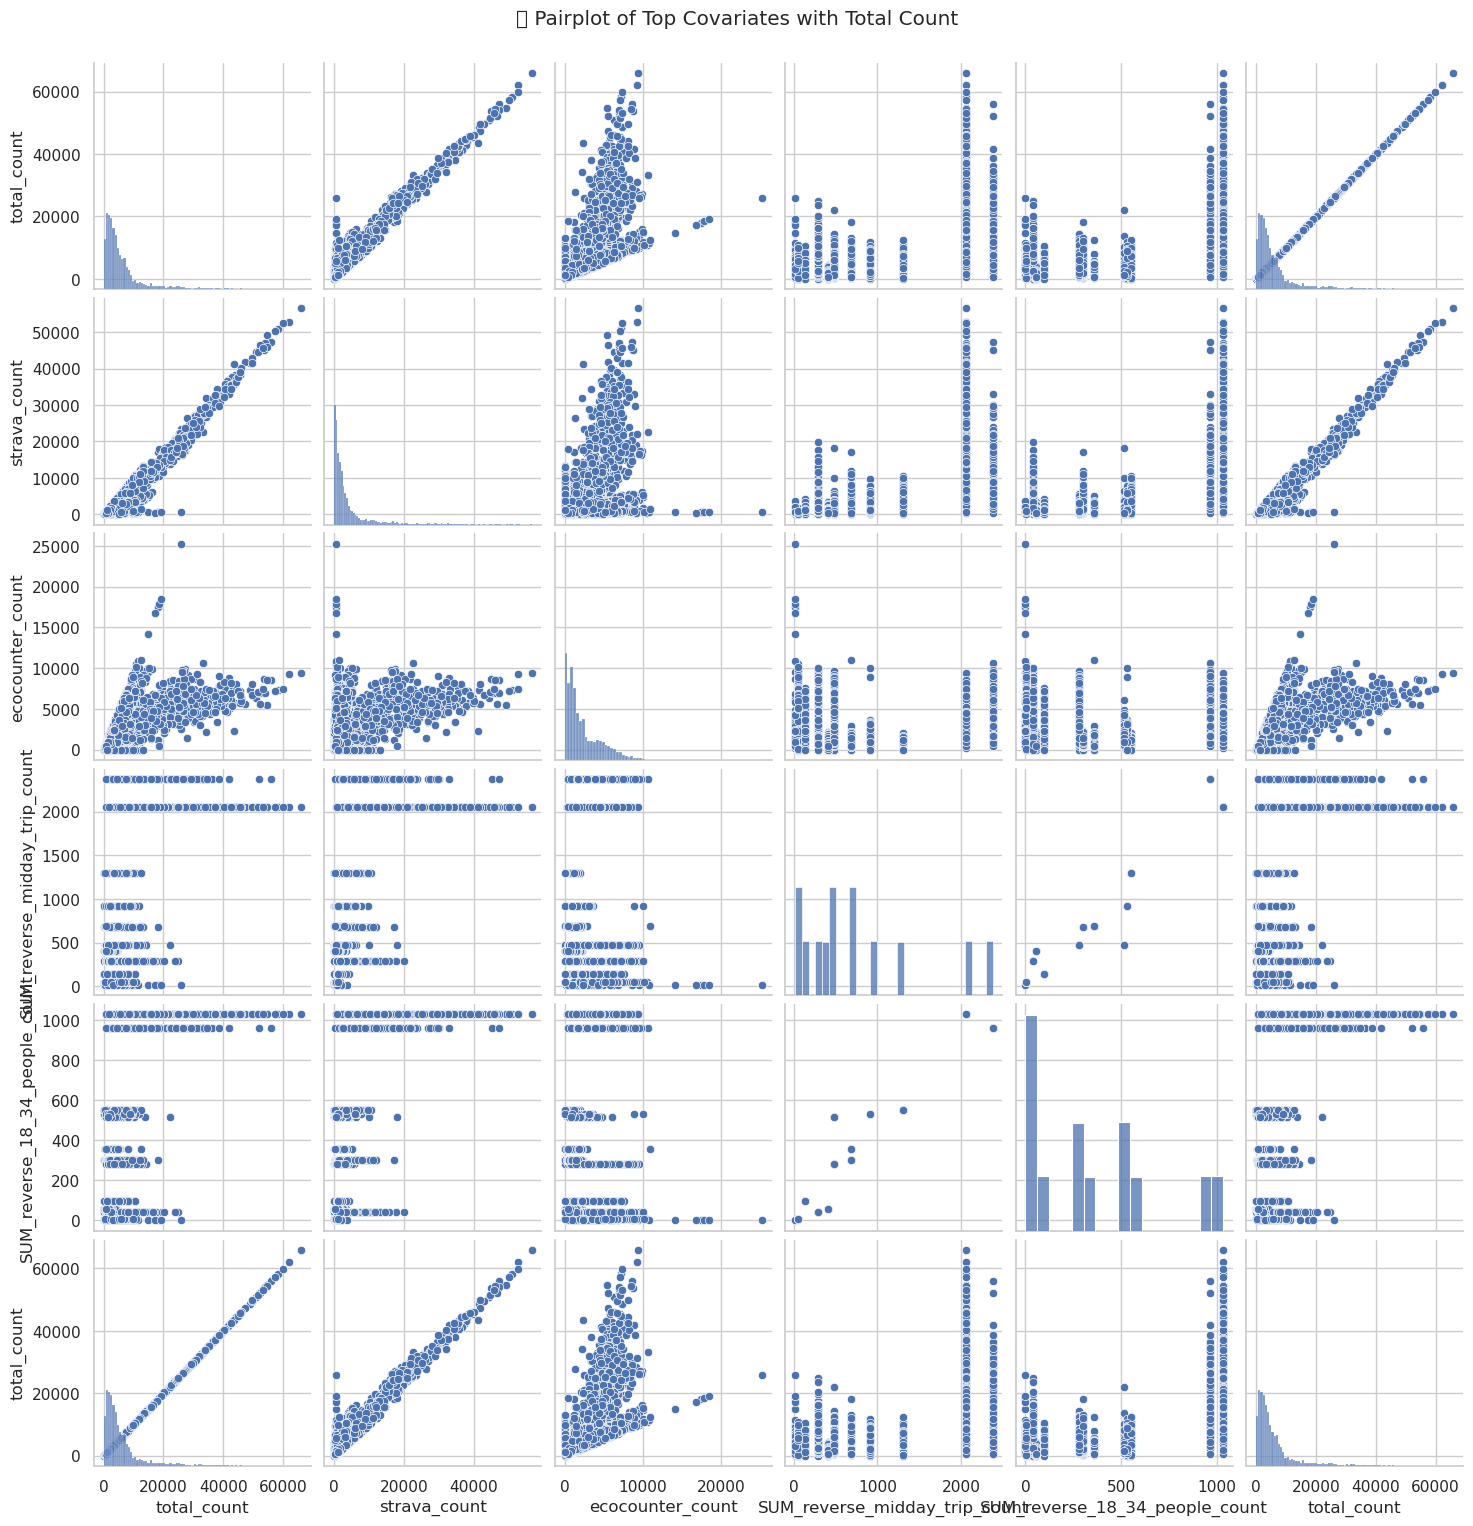

/tmp/ipykernel_339/3114913162.py:54: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


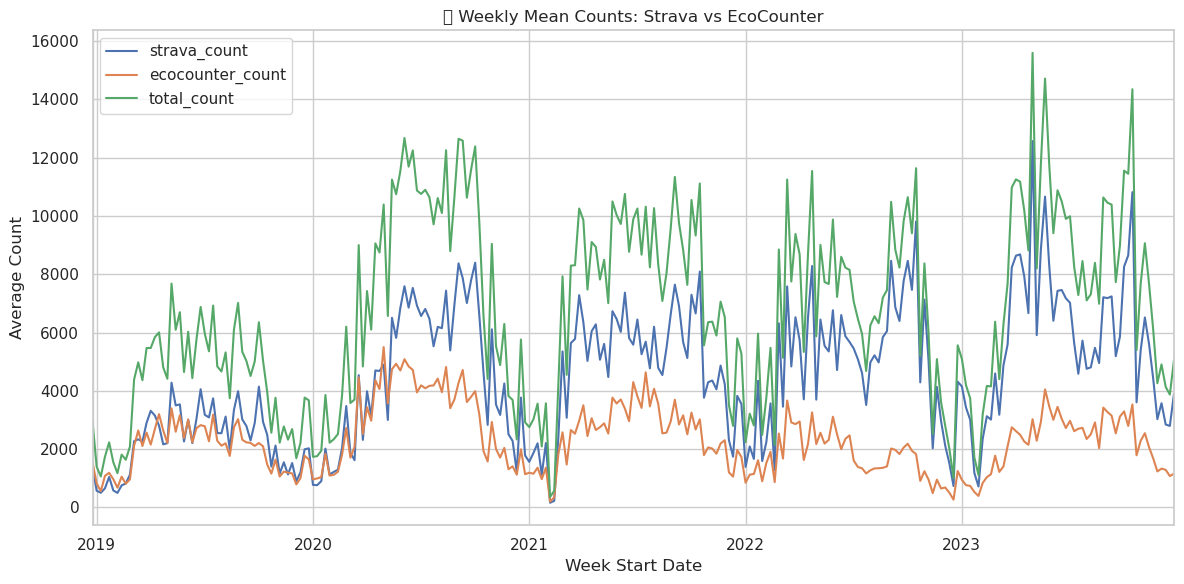

/tmp/ipykernel_339/3114913162.py:65: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


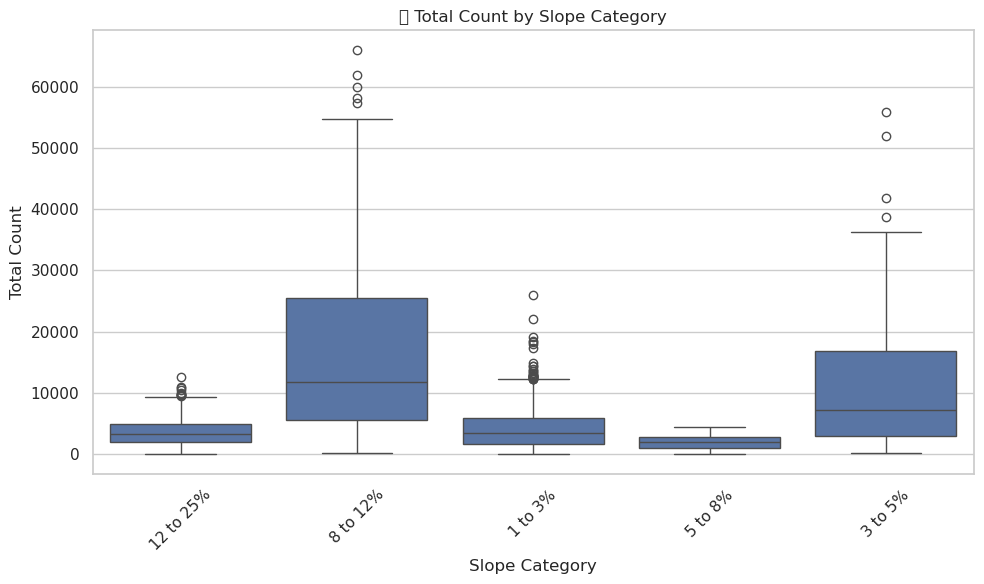

In [82]:
# --- Load Libraries ---
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Set Display Options ---
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# --- Load Data ---
data_path = '../processed_data/weekly_with_covariates.csv'
df = pd.read_csv(data_path, parse_dates=['week_start'])

# --- Rename columns for clarity ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- Identify numeric covariates ---
excluded_cols = ['GRID_ID', 'week_start', 'strava_count', 'ecocounter_count', 'total_count']
covariate_cols = [col for col in df.columns if col not in excluded_cols and pd.api.types.is_numeric_dtype(df[col])]

# --- Top 10 locations by average total activity ---
top_locations = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean()
top_locations = top_locations.sort_values('total_count', ascending=False).reset_index()
print("🌍 Top 10 Grid Cells by Average Total Count:")
print(top_locations.head(10))

# --- Covariate correlation matrix ---
print("\n📈 Covariate Correlations with Total Counts:")
correlations = df[covariate_cols + ['strava_count', 'ecocounter_count', 'total_count']].corr()
print(correlations[['strava_count', 'ecocounter_count', 'total_count']].loc[covariate_cols].sort_values('total_count', ascending=False))

# --- Pairplot for top correlated covariates ---
top_covs = correlations['total_count'].abs().sort_values(ascending=False).head(5).index.tolist()
if top_covs:
    sns.pairplot(df, vars=top_covs + ['total_count'])
    plt.suptitle("📊 Pairplot of Top Covariates with Total Count", y=1.02)
    plt.show()
else:
    print("⚠️ No strong covariates found for pairplot.")

# --- Time series trend for Strava vs EcoCounter ---
plt.figure(figsize=(12, 6))
df_weekly = df.groupby('week_start')[['strava_count', 'ecocounter_count', 'total_count']].mean()
df_weekly.plot(ax=plt.gca())
plt.title("📆 Weekly Mean Counts: Strava vs EcoCounter")
plt.xlabel("Week Start Date")
plt.ylabel("Average Count")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Boxplot of counts by slope class (if available) ---
if 'slopePct' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='slopePct', y='total_count')
    plt.title("📦 Total Count by Slope Category")
    plt.xlabel("Slope Category")
    plt.ylabel("Total Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'slopePct' column not found in the data.")

✅ File loaded successfully.
  GRID_ID week_start  strava_count  ecocounter_count  total_count
0   BD-17 2022-10-17        2765.0              1181       3946.0
1   BD-17 2020-10-05        3050.0              1837       4887.0
2   BE-15 2022-04-11       20680.0              3440      24120.0
3   BH-26 2020-12-21        2820.0               668       3488.0
4   BQ-25 2020-08-17        8965.0                 0       8965.0

📊 Summary Statistics:
       strava_count  ecocounter_count   total_count
count   3377.000000       3377.000000   3377.000000
mean    4472.807225       2312.891916   6785.699141
std     7220.435452       2289.639433   8572.885223
min        5.000000          0.000000      5.000000
25%      710.000000        698.000000   1955.000000
50%     1910.000000       1487.000000   3890.000000
75%     4405.000000       3481.000000   7487.000000
max    56525.000000      25277.000000  65973.000000

📈 Correlation Matrix:
                  strava_count  ecocounter_count  total_count


/tmp/ipykernel_339/1865416374.py:44: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


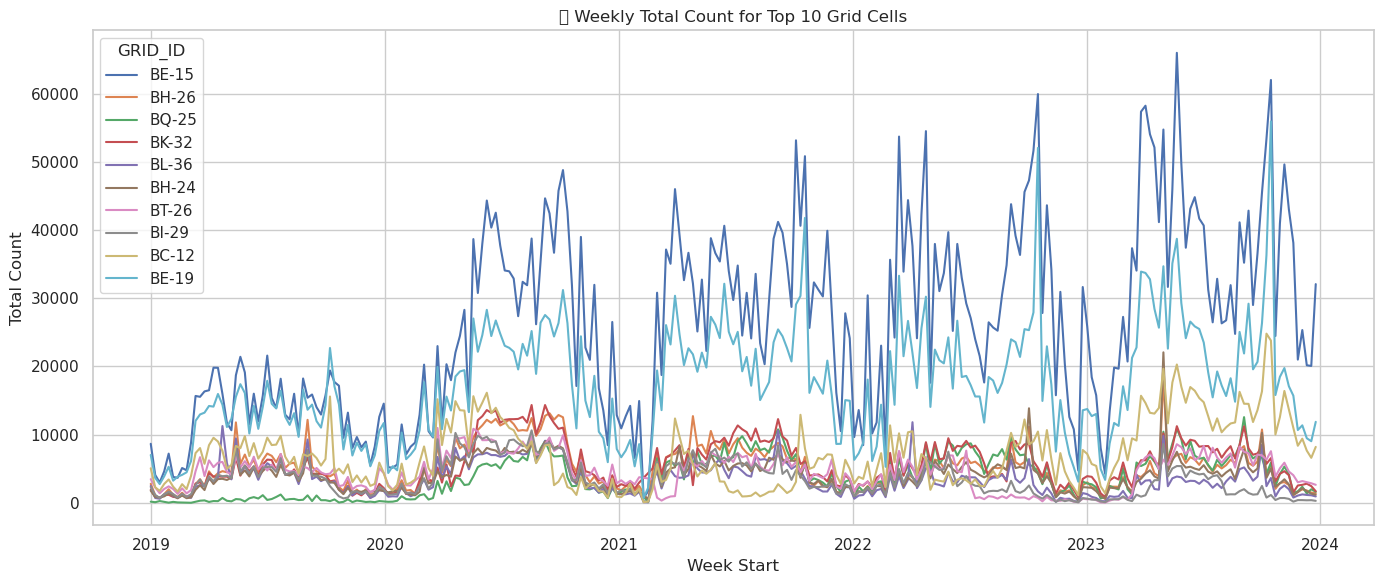


🧭 Found covariates: ['MAX_slopePct', 'Minority LandClass Pct', '2024 Median Household Income', '2024 Diversity Index']

📈 Covariate correlations with counts:
                              strava_count  ecocounter_count  total_count
MAX_slopePct                           NaN               NaN          NaN
Minority LandClass Pct           -0.179559         -0.174691    -0.197889
2024 Median Household Income      0.132678         -0.151739     0.071221
2024 Diversity Index             -0.343600         -0.145807    -0.328336


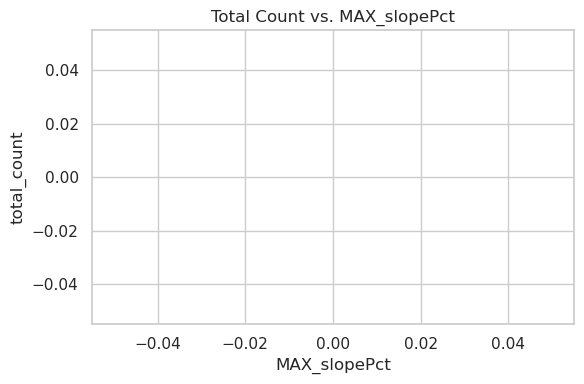

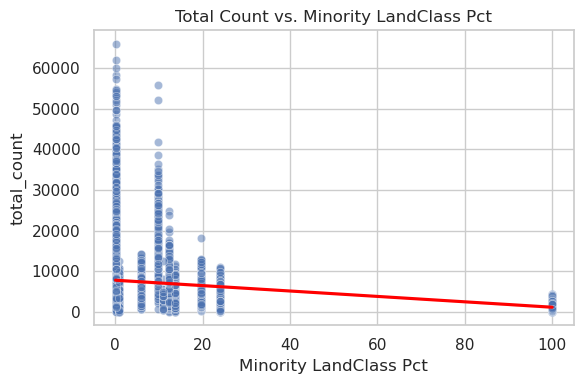

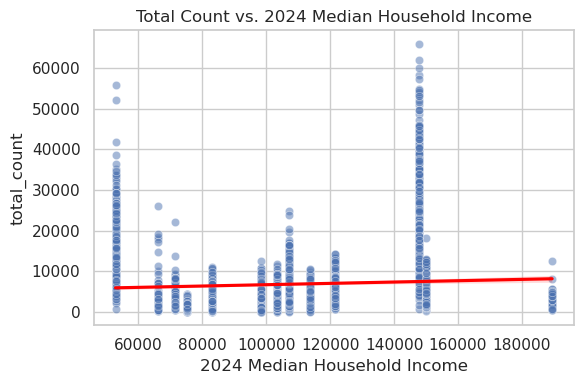

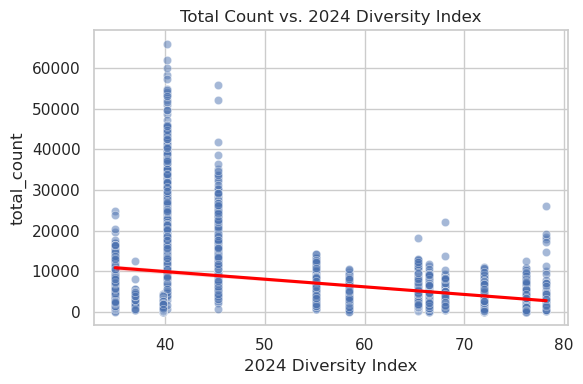

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 📁 Load Data ---
data_path = '../processed_data/weekly_with_covariates.csv'
df = pd.read_csv(data_path, parse_dates=['week_start'])

# --- ✅ Rename Columns for Simplicity ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🔍 Preview ---
print("✅ File loaded successfully.")
print(df[['GRID_ID', 'week_start', 'strava_count', 'ecocounter_count', 'total_count']].head())

# --- 📈 Summary Stats ---
print("\n📊 Summary Statistics:")
print(df[['strava_count', 'ecocounter_count', 'total_count']].describe())

# --- 🔗 Correlation Matrix ---
print("\n📈 Correlation Matrix:")
print(df[['strava_count', 'ecocounter_count', 'total_count']].corr())

# --- 🗺️ Top 10 Grid Cells by Mean Counts ---
grouped = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()
top_grids = grouped.sort_values('total_count', ascending=False).head(10)
print("\n🌍 Top 10 Grid Cells by Average Total Count:")
print(top_grids)

# --- 📉 Plot Trends for Top Grids ---
top_ids = top_grids['GRID_ID'].tolist()
df_top = df[df['GRID_ID'].isin(top_ids)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top, x='week_start', y='total_count', hue='GRID_ID')
plt.title('📈 Weekly Total Count for Top 10 Grid Cells')
plt.xlabel('Week Start')
plt.ylabel('Total Count')
plt.legend(title='GRID_ID')
plt.tight_layout()
plt.show()

# --- 🧭 Covariate Exploration ---
covariates = [
    'MAX_slopePct', 'Minority LandClass Pct',
    '2024 Median Household Income', '2024 Diversity Index'
]
covariates = [col for col in covariates if col in df.columns]
print("\n🧭 Found covariates:", covariates)

# --- 📊 Covariate Correlations ---
correlations = df[covariates + ['strava_count', 'ecocounter_count', 'total_count']].corr()
print("\n📈 Covariate correlations with counts:")
print(correlations.loc[covariates, ['strava_count', 'ecocounter_count', 'total_count']])

# --- 🖼️ Visualize Covariate Relationships ---
for cov in covariates:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df, x=cov, y='total_count', alpha=0.5)
    sns.regplot(data=df, x=cov, y='total_count', scatter=False, color='red')
    plt.title(f'Total Count vs. {cov}')
    plt.tight_layout()
    plt.show()

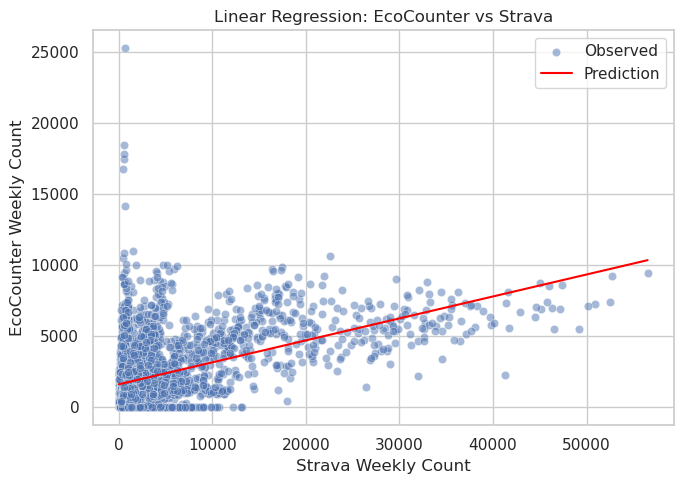

R²: 0.238
MAE: 1458.34
🧭 Average Counts by Spatial Cluster:
                 strava_count  ecocounter_count   total_count
spatial_cluster                                              
0                 6951.247601       3099.163148  10050.410749
1                 1999.224806       2252.841085   4252.065891
2                 2296.153846       2261.582692   4557.736538
3                 2245.282051       1648.617949   3893.900000
4                 1204.691120       1512.131274   2716.822394
5                13184.137931       3425.818008  16609.955939


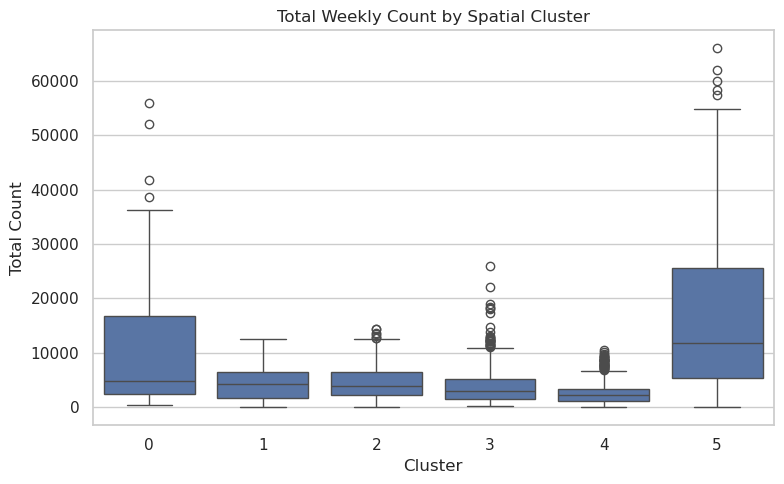

📈 Correlation of Covariates with Total Count:
MAX_slopePct                                            NaN
2024 Median Household Income                            NaN
2024 Diversity Index                                    NaN
Minority LandClass Pct                                  NaN
2022 HHs: Inc Below Poverty Level (ACS 5-Yr): Percent   NaN
total_count                                             NaN
Name: total_count, dtype: float64


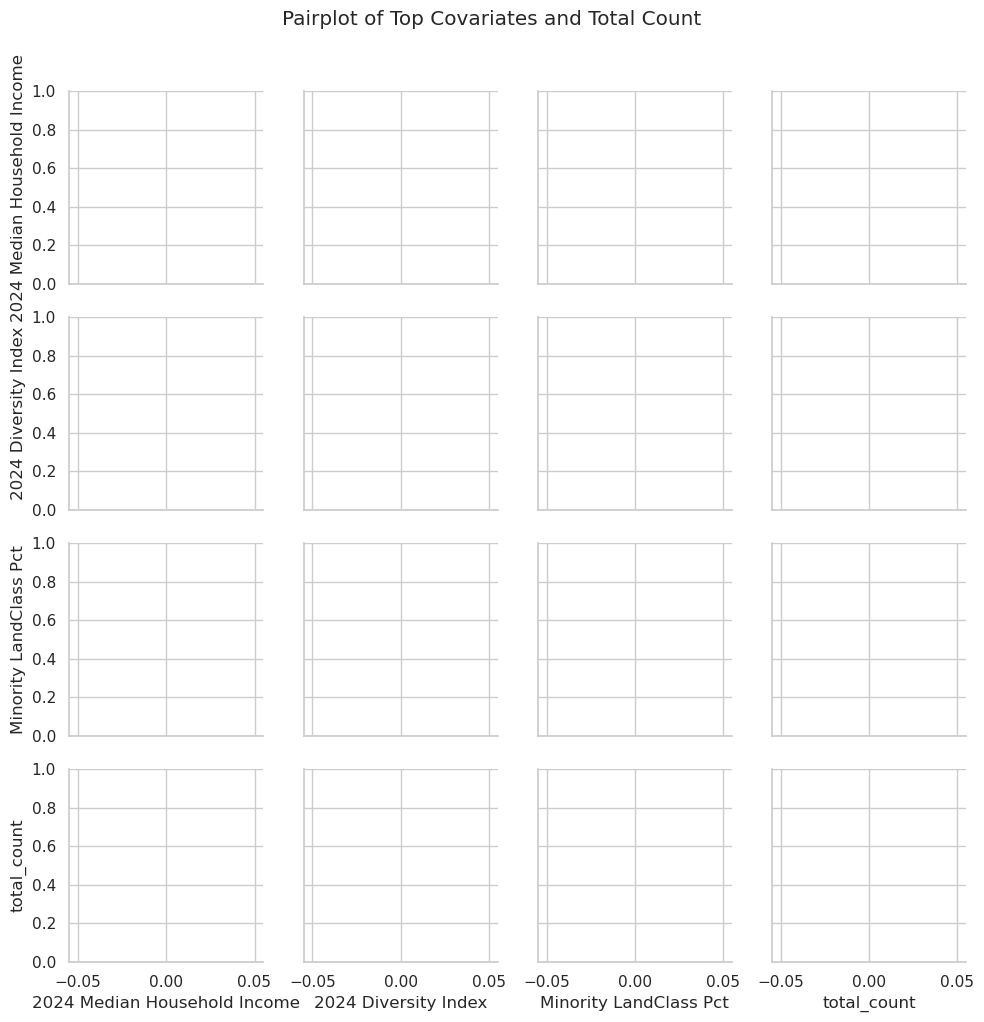

In [84]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import geopandas as gpd

# 📁 Load dataset
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# ✅ Rename key columns
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🔢 1. LINEAR REGRESSION MODELING ---
# 📊 Fit model to predict ecocounter from strava
reg_df = df.dropna(subset=['strava_count', 'ecocounter_count'])
X = reg_df[['strava_count']]
y = reg_df['ecocounter_count']

model = LinearRegression()
model.fit(X, y)
reg_df['ecocounter_pred'] = model.predict(X)

# 📈 Plot predictions
plt.figure(figsize=(7, 5))
sns.scatterplot(x='strava_count', y='ecocounter_count', data=reg_df, alpha=0.5, label='Observed')
sns.lineplot(x='strava_count', y='ecocounter_pred', data=reg_df, color='red', label='Prediction')
plt.title('Linear Regression: EcoCounter vs Strava')
plt.xlabel('Strava Weekly Count')
plt.ylabel('EcoCounter Weekly Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🧮 Print metrics
print(f"R²: {r2_score(y, reg_df['ecocounter_pred']):.3f}")
print(f"MAE: {mean_absolute_error(y, reg_df['ecocounter_pred']):.2f}")

# --- 🌍 2. SPATIAL CLUSTERING ---
# Use spatial components to identify regional patterns
spatial_cols = [col for col in df.columns if 'Spatial Component' in col]
spatial_df = df[spatial_cols].dropna()

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(spatial_df)

# Fit KMeans
kmeans = KMeans(n_clusters=6, random_state=42)
df['spatial_cluster'] = kmeans.fit_predict(X_scaled)

# 🔎 Cluster summary
cluster_summary = df.groupby('spatial_cluster')[['strava_count', 'ecocounter_count', 'total_count']].mean()
print("🧭 Average Counts by Spatial Cluster:")
print(cluster_summary)

# 📊 Plot boxplot of total count by cluster
plt.figure(figsize=(8, 5))
sns.boxplot(x='spatial_cluster', y='total_count', data=df)
plt.title('Total Weekly Count by Spatial Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Count')
plt.tight_layout()
plt.show()

# --- 📌 3. COVARIATE EXPLORATION ---
# Select relevant covariates
covariates = ['MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index', 
              'Minority LandClass Pct', '2022 HHs: Inc Below Poverty Level (ACS 5-Yr): Percent']

# Drop NaNs
explore_df = df.dropna(subset=covariates + ['total_count'])

# Compute correlations
corrs = explore_df[covariates + ['total_count']].corr()
print("📈 Correlation of Covariates with Total Count:")
print(corrs['total_count'].sort_values(ascending=False))

# 📊 Pairplot of top 3
top3_covariates = corrs['total_count'].abs().sort_values(ascending=False).index[1:4]
sns.pairplot(explore_df, vars=top3_covariates.tolist() + ['total_count'])
plt.suptitle('Pairplot of Top Covariates and Total Count', y=1.02)
plt.tight_layout()
plt.show()


Summary Statistics:
       strava_count  ecocounter_count   total_count
count   3377.000000       3377.000000   3377.000000
mean    4472.807225       2312.891916   6785.699141
std     7220.435452       2289.639433   8572.885223
min        5.000000          0.000000      5.000000
25%      710.000000        698.000000   1955.000000
50%     1910.000000       1487.000000   3890.000000
75%     4405.000000       3481.000000   7487.000000
max    56525.000000      25277.000000  65973.000000

📈 Covariate correlations:
                              strava_count  ecocounter_count  total_count
MAX_slopePct                           NaN               NaN          NaN
Minority LandClass Pct           -0.179559         -0.174691    -0.197889
2024 Median Household Income      0.132678         -0.151739     0.071221
2024 Diversity Index             -0.343600         -0.145807    -0.328336

🧠 Linear regression: Predicting EcoCounter from Strava
R^2 score: 0.238, Slope: 0.15, Intercept: 1621.52

🌍 Top 1

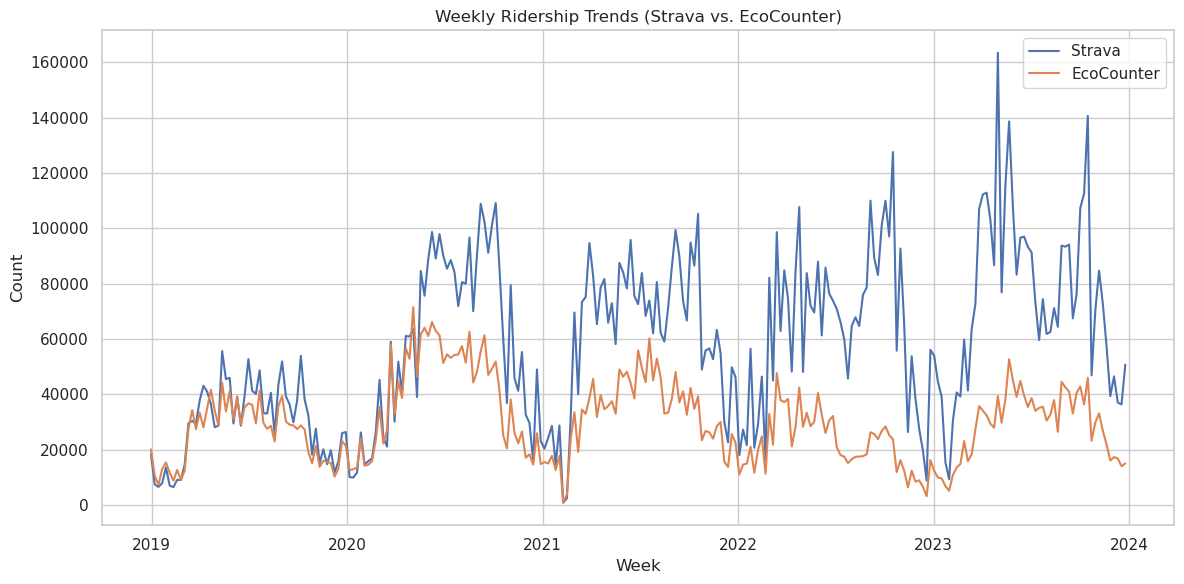

✅ Interactive map saved to 'interactive_map.html'


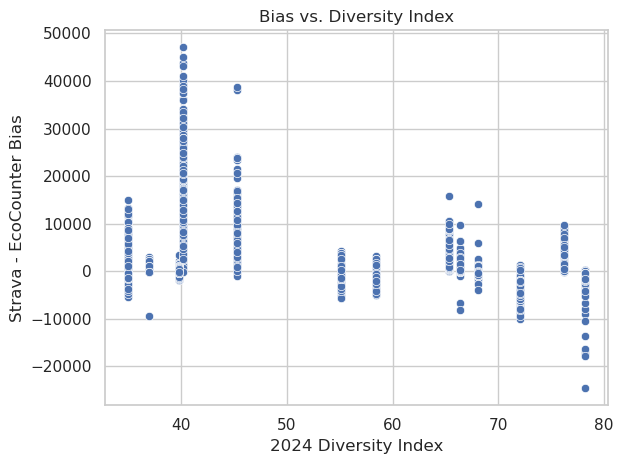

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import plotly.express as px
import folium

# --- 1. 📁 Load and Prepare Data ---
data_path = '../processed_data/weekly_with_covariates.csv'
df = pd.read_csv(data_path, parse_dates=['week_start'])

# ✅ Rename Key Columns
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 2. 📊 Summary Statistics ---
print("\nSummary Statistics:")
print(df[['strava_count', 'ecocounter_count', 'total_count']].describe())

# 📈 Correlation with Covariates
covariates = [
    'MAX_slopePct', 'Minority LandClass Pct', '2024 Median Household Income',
    '2024 Diversity Index'
]
existing_covariates = [col for col in covariates if col in df.columns]

print("\n📈 Covariate correlations:")
correlations = df[existing_covariates + ['strava_count', 'ecocounter_count', 'total_count']].corr()
print(correlations[['strava_count', 'ecocounter_count', 'total_count']].loc[existing_covariates])

# --- 3. 🧠 Linear Regression Modeling ---
print("\n🧠 Linear regression: Predicting EcoCounter from Strava")
X = df[['strava_count']].fillna(0)
y = df['ecocounter_count'].fillna(0)
reg = LinearRegression().fit(X, y)
print(f"R^2 score: {reg.score(X, y):.3f}, Slope: {reg.coef_[0]:.2f}, Intercept: {reg.intercept_:.2f}")

# --- 4. 🔍 Spatial Clustering (KMeans on average counts by GRID_ID) ---
df_cluster = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().dropna()
kmeans = KMeans(n_clusters=3, random_state=42).fit(df_cluster[['strava_count', 'ecocounter_count']])
df_cluster['cluster'] = kmeans.labels_
df_cluster = df_cluster.reset_index()

print("\n🌍 Top 10 Grid Cells by Average Total Count:")
print(df_cluster.sort_values('total_count', ascending=False).head(10))

# --- 5. 🕒 Time-Series Breakdown (weekly totals) ---
df_weekly = df.groupby('week_start')[['strava_count', 'ecocounter_count']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(df_weekly['week_start'], df_weekly['strava_count'], label='Strava')
plt.plot(df_weekly['week_start'], df_weekly['ecocounter_count'], label='EcoCounter')
plt.title('Weekly Ridership Trends (Strava vs. EcoCounter)')
plt.xlabel('Week')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

# --- 6. 🌍 Interactive Folium Map ---
df_map = df.dropna(subset=['GRID_ID']).drop_duplicates('GRID_ID').reset_index(drop=True)
df_map['lat'] = 36.372 + (df_map.index % 10) * 0.01
df_map['lon'] = -94.21 + (df_map.index % 10) * 0.01

# Merge in cluster info
df_map = df_map.merge(df_cluster[['GRID_ID', 'cluster']], on='GRID_ID', how='left')

m = folium.Map(location=[36.37, -94.21], zoom_start=10)

for _, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=6,
        popup=f"GRID_ID: {row['GRID_ID']}, Cluster: {row['cluster']}",
        color='blue' if row['cluster'] == 0 else 'green' if row['cluster'] == 1 else 'red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m.save('interactive_map.html')
print("✅ Interactive map saved to 'interactive_map.html'")

# --- 7. 📌 Explore Specific Covariate (e.g., Diversity Index vs. Bias) ---
df['bias'] = df['strava_count'] - df['ecocounter_count']
sns.scatterplot(data=df, x='2024 Diversity Index', y='bias')
plt.title('Bias vs. Diversity Index')
plt.xlabel('2024 Diversity Index')
plt.ylabel('Strava - EcoCounter Bias')
plt.tight_layout()
plt.show()

🚫 No valid rows for modeling after cleaning.


/tmp/ipykernel_339/2710714593.py:65: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1000x500 with 0 Axes>

/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


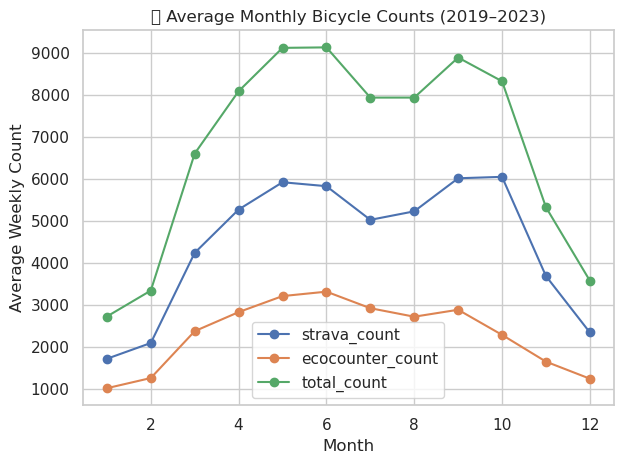

✅ Cleaned dataset saved as df_cleaned.csv


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# --- 📁 Load Data ---
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# --- ✅ Rename columns for modeling ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🧹 Convert slope category to numeric midpoint ---
slope_map = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].map(slope_map)

# --- 🔢 Convert other covariates to numeric ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- 🧠 Multivariate Regression ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

if not df_model.empty:
    X = df_model[features]
    y = df_model['ecocounter_count']

    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    print("🔢 Multivariate Regression Results:")
    print(f"  R² Score: {r2_score(y, y_pred):.3f}")
    print(f"  RMSE: {mean_squared_error(y, y_pred, squared=False):.2f}")
    print("  Coefficients:")
    for feat, coef in zip(features, model.coef_):
        print(f"    {feat}: {coef:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")
else:
    print("🚫 No valid rows for modeling after cleaning.")

# --- 📈 Seasonal Breakdown ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()

plt.figure(figsize=(10, 5))
monthly_avg.plot(marker='o')
plt.title('📆 Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 💾 Save Cleaned Data ---
df.to_csv('../processed_data/df_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as df_cleaned.csv")

🚫 No valid rows for modeling after cleaning.


/tmp/ipykernel_339/1440122452.py:69: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


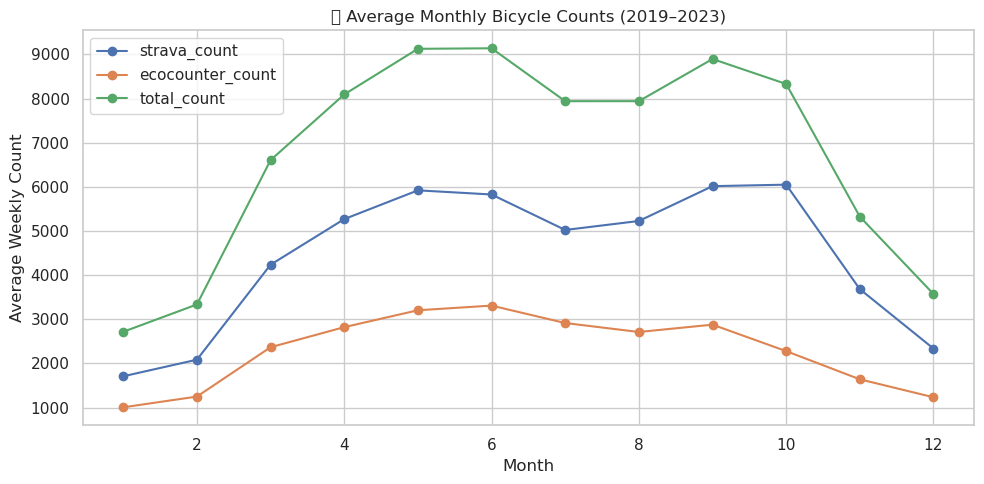

🗺️ Interactive map saved: spatial_clusters_map.html
✅ Cleaned dataset saved as df_cleaned.csv


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

# --- 📁 Load Data ---
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# --- ✅ Rename for simplicity ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🧹 Clean and Convert Slope Category to Numeric Midpoint ---
df['MAX_slopePct'] = df['MAX_slopePct'].astype(str).str.replace('–', '-', regex=False).str.strip()

slope_bins = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].replace(slope_bins)
df['MAX_slopePct'] = pd.to_numeric(df['MAX_slopePct'], errors='coerce')

# --- 🔢 Convert Other Covariates ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- 🧠 Multivariate Regression ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

if not df_model.empty:
    X = df_model[features]
    y = df_model['ecocounter_count']

    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    print("🔢 Multivariate Regression Results:")
    print(f"  R² Score: {r2_score(y, y_pred):.3f}")
    print(f"  RMSE: {mean_squared_error(y, y_pred, squared=False):.2f}")
    print("  Coefficients:")
    for feat, coef in zip(features, model.coef_):
        print(f"    {feat}: {coef:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")
else:
    print("🚫 No valid rows for modeling after cleaning.")

# --- 📈 Seasonal Breakdown ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()

monthly_avg.plot(marker='o', figsize=(10, 5))
plt.title('📆 Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 🌍 Spatial Clustering & Mapping ---
# Compute average count per GRID_ID
df_grid = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()

# Cluster grid cells by usage
kmeans = KMeans(n_clusters=3, random_state=42)
df_grid['cluster'] = kmeans.fit_predict(df_grid[['strava_count', 'ecocounter_count']])

# Assign mock coordinates for demo purposes
df_grid['lat'] = 36.3 + (np.arange(len(df_grid)) % 20) * 0.01
df_grid['lon'] = -94.3 + (np.arange(len(df_grid)) // 20) * 0.01

# Create folium map
m = folium.Map(location=[36.37, -94.21], zoom_start=10)

# Add circles to map
for _, row in df_grid.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['total_count'] / 5000,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=(f"GRID: {row['GRID_ID']}<br>"
               f"Strava: {row['strava_count']:.0f}<br>"
               f"EcoCounter: {row['ecocounter_count']:.0f}<br>"
               f"Cluster: {row['cluster']}")
    ).add_to(m)

m.save('../processed_data/spatial_clusters_map.html')
print("🗺️ Interactive map saved: spatial_clusters_map.html")

# --- 💾 Save Cleaned Data ---
df.to_csv('../processed_data/df_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as df_cleaned.csv")

🚫 No valid rows for modeling after cleaning.


/tmp/ipykernel_339/389217885.py:71: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


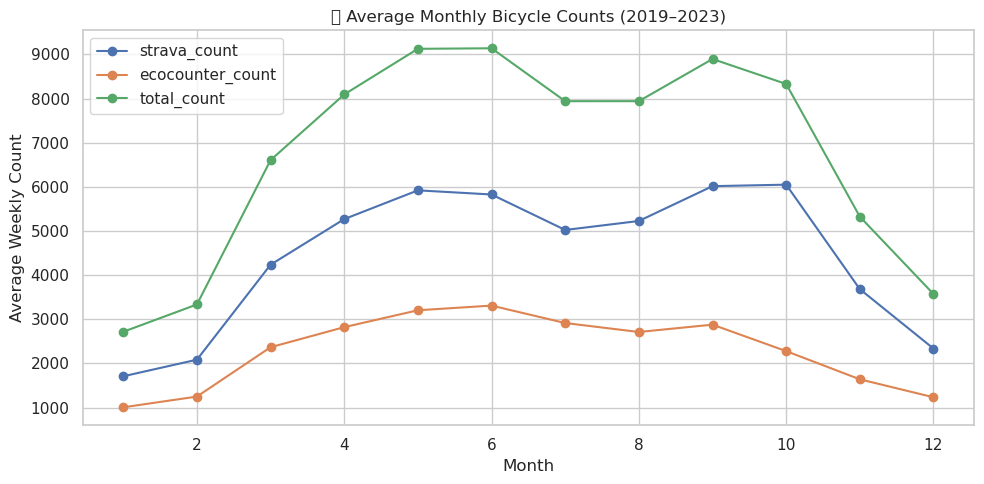

🗺️ Interactive map saved: spatial_clusters_map.html
✅ Cleaned dataset saved as df_cleaned.csv


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

# --- 📁 Load Data ---
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# --- ✅ Rename for simplicity ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🧹 Clean and Convert Slope Category to Numeric Midpoint ---
df['MAX_slopePct'] = df['MAX_slopePct'].astype(str).str.replace('–', '-', regex=False).str.strip()

slope_bins = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].replace(slope_bins)
df['MAX_slopePct'] = pd.to_numeric(df['MAX_slopePct'], errors='coerce')

# --- 🔢 Convert Other Covariates ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- 🧠 Multivariate Regression ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

if not df_model.empty:
    X = df_model[features]
    y = df_model['ecocounter_count']

    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    print("\n🔢 Multivariate Regression Results:")
    print(f"  R² Score: {r2_score(y, y_pred):.3f}")
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    print(f"  RMSE: {rmse:.2f}")
    print("  Coefficients:")
    for feat, coef in zip(features, model.coef_):
        print(f"    {feat}: {coef:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")
else:
    print("🚫 No valid rows for modeling after cleaning.")

# --- 📈 Seasonal Breakdown ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()

monthly_avg.plot(marker='o', figsize=(10, 5))
plt.title('📆 Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 🌍 Spatial Clustering & Mapping ---
df_grid = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()

# Cluster by Strava + EcoCounter counts
kmeans = KMeans(n_clusters=3, random_state=42)
df_grid['cluster'] = kmeans.fit_predict(df_grid[['strava_count', 'ecocounter_count']])

# Assign dummy coordinates for display (replace with real lat/lon if available)
df_grid['lat'] = 36.3 + (np.arange(len(df_grid)) % 20) * 0.01
df_grid['lon'] = -94.3 + (np.arange(len(df_grid)) // 20) * 0.01

# Create map
m = folium.Map(location=[36.37, -94.21], zoom_start=10)

for _, row in df_grid.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['total_count'] / 5000,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=(f"GRID: {row['GRID_ID']}<br>"
               f"Strava: {row['strava_count']:.0f}<br>"
               f"EcoCounter: {row['ecocounter_count']:.0f}<br>"
               f"Cluster: {row['cluster']}")
    ).add_to(m)

m.save('../processed_data/spatial_clusters_map.html')
print("🗺️ Interactive map saved: spatial_clusters_map.html")

# --- 💾 Save Cleaned Data ---
df.to_csv('../processed_data/df_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as df_cleaned.csv")

In [90]:
print("❓ Missing values before modeling:")
print(df[features + ['ecocounter_count']].isna().sum())

❓ Missing values before modeling:
strava_count                       0
MAX_slopePct                    3377
2024 Median Household Income       0
2024 Diversity Index               0
ecocounter_count                   0
dtype: int64


❓ Missing values before modeling:
strava_count                       0
MAX_slopePct                    3377
2024 Median Household Income       0
2024 Diversity Index               0
ecocounter_count                   0
dtype: int64
🚫 No valid rows for modeling after cleaning.


/tmp/ipykernel_339/127965291.py:73: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


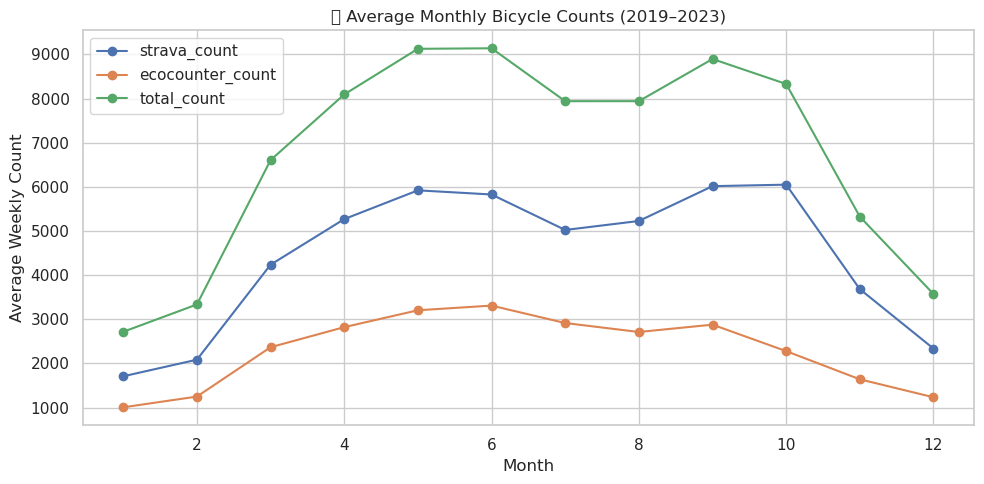

🗺️ Interactive map saved: spatial_clusters_map.html
✅ Cleaned dataset saved as df_cleaned.csv


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

# --- 📁 Load Data ---
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# --- ✅ Rename columns for modeling ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🧹 Convert slope to numeric midpoint ---
df['MAX_slopePct'] = df['MAX_slopePct'].astype(str).str.replace('–', '-', regex=False).str.strip()
slope_bins = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].replace(slope_bins)
df['MAX_slopePct'] = pd.to_numeric(df['MAX_slopePct'], errors='coerce')

# --- 🔢 Convert other covariates to numeric ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- ❓ Check missing values before modeling ---
print("❓ Missing values before modeling:")
print(df[['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index', 'ecocounter_count']].isna().sum())

# --- 🧠 Multivariate Regression ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

if not df_model.empty:
    X = df_model[features]
    y = df_model['ecocounter_count']

    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    print("\n🔢 Multivariate Regression Results:")
    print(f"  R² Score: {r2_score(y, y_pred):.3f}")
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    print(f"  RMSE: {rmse:.2f}")
    print("  Coefficients:")
    for feat, coef in zip(features, model.coef_):
        print(f"    {feat}: {coef:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")
else:
    print("🚫 No valid rows for modeling after cleaning.")

# --- 📈 Seasonal Breakdown ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()

monthly_avg.plot(marker='o', figsize=(10, 5))
plt.title('📆 Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 🌍 Spatial Clustering & Mapping ---
# Compute average count per GRID_ID
df_grid = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()

# Cluster grid cells by usage
kmeans = KMeans(n_clusters=3, random_state=42)
df_grid['cluster'] = kmeans.fit_predict(df_grid[['strava_count', 'ecocounter_count']])

# Assign mock lat/lon coordinates for demonstration
df_grid['lat'] = 36.3 + (np.arange(len(df_grid)) % 20) * 0.01
df_grid['lon'] = -94.3 + (np.arange(len(df_grid)) // 20) * 0.01

# Create interactive map
m = folium.Map(location=[36.37, -94.21], zoom_start=10)

for _, row in df_grid.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['total_count'] / 5000,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=(f"GRID: {row['GRID_ID']}<br>"
               f"Strava: {row['strava_count']:.0f}<br>"
               f"EcoCounter: {row['ecocounter_count']:.0f}<br>"
               f"Cluster: {row['cluster']}")
    ).add_to(m)

m.save('../processed_data/spatial_clusters_map.html')
print("🗺️ Interactive map saved: spatial_clusters_map.html")

# --- 💾 Save Cleaned Data ---
df.to_csv('../processed_data/df_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as df_cleaned.csv")

❓ Missing values before modeling:
strava_count                       0
MAX_slopePct                    3377
2024 Median Household Income       0
2024 Diversity Index               0
ecocounter_count                   0
dtype: int64
🚫 No valid rows for modeling after cleaning.


/srv/conda/envs/notebook/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_339/1133108262.py:78: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


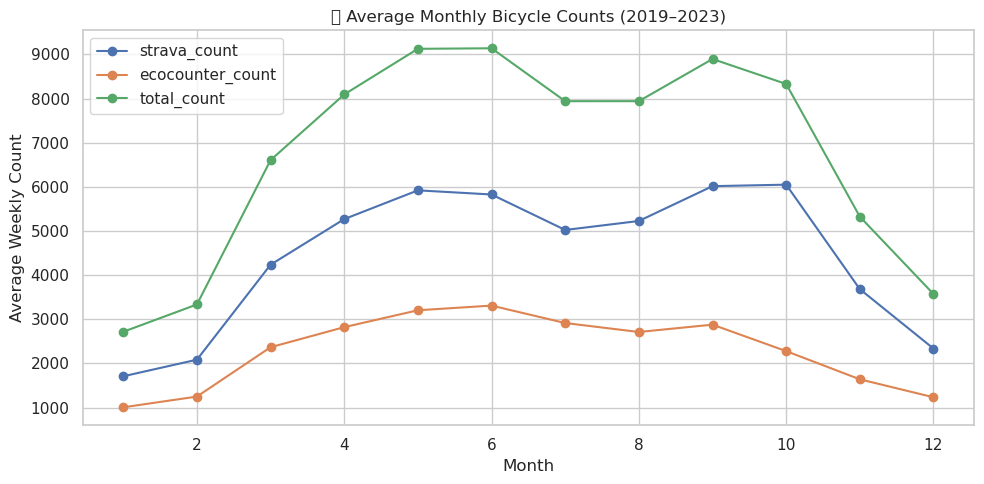

🗺️ Interactive map saved: spatial_clusters_map.html
✅ Cleaned dataset saved as df_cleaned.csv


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

# --- 📁 Load Data ---
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# --- ✅ Rename for simplicity ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🧹 Clean and Convert Slope Category to Numeric Midpoint ---
df['MAX_slopePct'] = df['MAX_slopePct'].astype(str).str.replace('–', '-', regex=False).str.strip()

slope_bins = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].replace(slope_bins)
df['MAX_slopePct'] = pd.to_numeric(df['MAX_slopePct'], errors='coerce')

# Fill missing slope with median
df['MAX_slopePct'] = df['MAX_slopePct'].fillna(df['MAX_slopePct'].median())

# --- 🔢 Convert Other Covariates ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- ❓ Report Missing Values ---
print("❓ Missing values before modeling:")
print(df[['strava_count', 'MAX_slopePct', '2024 Median Household Income', 
          '2024 Diversity Index', 'ecocounter_count']].isna().sum())

# --- 🧠 Multivariate Regression ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

if not df_model.empty:
    X = df_model[features]
    y = df_model['ecocounter_count']

    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    print("\n🔢 Multivariate Regression Results:")
    print(f"  R² Score: {r2_score(y, y_pred):.3f}")
    rmse = mean_squared_error(y, y_pred) ** 0.5
    print(f"  RMSE: {rmse:.2f}")
    print("  Coefficients:")
    for feat, coef in zip(features, model.coef_):
        print(f"    {feat}: {coef:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")
else:
    print("🚫 No valid rows for modeling after cleaning.")

# --- 📈 Seasonal Breakdown ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()

monthly_avg.plot(marker='o', figsize=(10, 5))
plt.title('📆 Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 🌍 Spatial Clustering & Mapping ---
# Compute average count per GRID_ID
df_grid = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()

# Cluster grid cells by usage
kmeans = KMeans(n_clusters=3, random_state=42)
df_grid['cluster'] = kmeans.fit_predict(df_grid[['strava_count', 'ecocounter_count']])

# Assign mock coordinates for visualization (replace with real lat/lon if available)
df_grid['lat'] = 36.3 + (np.arange(len(df_grid)) % 20) * 0.01
df_grid['lon'] = -94.3 + (np.arange(len(df_grid)) // 20) * 0.01

# Create folium map
m = folium.Map(location=[36.37, -94.21], zoom_start=10)

# Add circles to map
for _, row in df_grid.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['total_count'] / 5000,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=(f"GRID: {row['GRID_ID']}<br>"
               f"Strava: {row['strava_count']:.0f}<br>"
               f"EcoCounter: {row['ecocounter_count']:.0f}<br>"
               f"Cluster: {row['cluster']}")
    ).add_to(m)

m.save('../processed_data/spatial_clusters_map.html')
print("🗺️ Interactive map saved: spatial_clusters_map.html")

# --- 💾 Save Cleaned Data ---
df.to_csv('../processed_data/df_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as df_cleaned.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

# --- 📁 Load Data ---
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# --- ✅ Rename for simplicity ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🧹 Clean and Convert Slope Category to Numeric Midpoint ---
df['MAX_slopePct'] = df['MAX_slopePct'].astype(str).str.replace('–', '-', regex=False).str.strip()
slope_bins = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].replace(slope_bins)
df['MAX_slopePct'] = pd.to_numeric(df['MAX_slopePct'], errors='coerce')

# --- 🔢 Convert Other Covariates ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- ❓ Missing values report ---
print("\n❓ Missing values before modeling:")
print(df[['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index', 'ecocounter_count']].isna().sum())

# --- 🧠 Multivariate Regression ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

if not df_model.empty:
    X = df_model[features]
    y = df_model['ecocounter_count']

    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    rmse = np.sqrt(mean_squared_error(y, y_pred))

    print("\n🔢 Multivariate Regression Results:")
    print(f"  R² Score: {r2_score(y, y_pred):.3f}")
    print(f"  RMSE: {rmse:.2f}")
    print("  Coefficients:")
    for feat, coef in zip(features, model.coef_):
        print(f"    {feat}: {coef:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")
else:
    print("\n🚫 No valid rows for modeling after cleaning.")

# --- 📈 Seasonal Breakdown ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()

monthly_avg.plot(marker='o', figsize=(10, 5))
plt.title('📆 Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 🌍 Spatial Clustering & Mapping ---
df_grid = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()

# Cluster grid cells by usage
kmeans = KMeans(n_clusters=3, random_state=42)
df_grid['cluster'] = kmeans.fit_predict(df_grid[['strava_count', 'ecocounter_count']])

# Assign mock coordinates for demo purposes
df_grid['lat'] = 36.3 + (np.arange(len(df_grid)) % 20) * 0.01
df_grid['lon'] = -94.3 + (np.arange(len(df_grid)) // 20) * 0.01

# Create folium map
m = folium.Map(location=[36.37, -94.21], zoom_start=10)
for _, row in df_grid.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['total_count'] / 5000,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=(f"GRID: {row['GRID_ID']}<br>"
               f"Strava: {row['strava_count']:.0f}<br>"
               f"EcoCounter: {row['ecocounter_count']:.0f}<br>"
               f"Cluster: {row['cluster']}")
    ).add_to(m)

m.save('../processed_data/spatial_clusters_map.html')
print("\n🗺️ Interactive map saved: spatial_clusters_map.html")

# --- 💾 Save Cleaned Data ---
df.to_csv('../processed_data/df_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as df_cleaned.csv")

In [ ]:
# 🚲 Bicycle Count Analysis with Multivariate Modeling, Seasonality, Clustering, and Dashboard Prep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

# --- 📁 Load Data ---
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# --- ✅ Rename for simplicity ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🧹 Clean and Convert Slope Category to Numeric Midpoint ---
df['MAX_slopePct'] = df['MAX_slopePct'].astype(str).str.replace('–', '-', regex=False).str.strip()
slope_bins = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].replace(slope_bins)
df['MAX_slopePct'] = pd.to_numeric(df['MAX_slopePct'], errors='coerce')

# --- 🔢 Convert Other Covariates ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- ❓ Show Missing Values ---
print("\n❓ Missing values before modeling:")
print(df[['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index', 'ecocounter_count']].isna().sum())

# --- 🧠 Multivariate Regression ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

if not df_model.empty:
    X = df_model[features]
    y = df_model['ecocounter_count']
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    print("\n🔢 Multivariate Regression Results:")
    print(f"  R² Score: {r2_score(y, y_pred):.3f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")
    print("  Coefficients:")
    for feat, coef in zip(features, model.coef_):
        print(f"    {feat}: {coef:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")
else:
    print("🚫 No valid rows for modeling after cleaning.")

# --- 📈 Seasonal Breakdown ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()
monthly_avg.plot(marker='o', figsize=(10, 5))
plt.title('📆 Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 🌍 Spatial Clustering & Mapping ---
df_grid = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()
kmeans = KMeans(n_clusters=3, random_state=42)
df_grid['cluster'] = kmeans.fit_predict(df_grid[['strava_count', 'ecocounter_count']])
df_grid['lat'] = 36.3 + (np.arange(len(df_grid)) % 20) * 0.01
df_grid['lon'] = -94.3 + (np.arange(len(df_grid)) // 20) * 0.01
m = folium.Map(location=[36.37, -94.21], zoom_start=10)
for _, row in df_grid.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['total_count'] / 5000,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=(f"GRID: {row['GRID_ID']}<br>"
               f"Strava: {row['strava_count']:.0f}<br>"
               f"EcoCounter: {row['ecocounter_count']:.0f}<br>"
               f"Cluster: {row['cluster']}")
    ).add_to(m)
m.save('../processed_data/spatial_clusters_map.html')
print("🗺️ Interactive map saved: spatial_clusters_map.html")

# --- 📊 Run Regression per Season ---
df['season'] = df['month'].map({12:'Winter', 1:'Winter', 2:'Winter', 3:'Spring', 4:'Spring', 5:'Spring',
                                6:'Summer', 7:'Summer', 8:'Summer', 9:'Fall', 10:'Fall', 11:'Fall'})
print("\n📊 Regression by Season:")
for season, group in df.groupby('season'):
    group_model = group.dropna(subset=features + ['ecocounter_count'])
    if len(group_model) > 0:
        model = LinearRegression().fit(group_model[features], group_model['ecocounter_count'])
        r2 = r2_score(group_model['ecocounter_count'], model.predict(group_model[features]))
        print(f"  {season}: R² = {r2:.3f}")

# --- 📊 Compare Pre/Post Bias Correction ---
df['bias_ratio'] = df['strava_count'] / (df['ecocounter_count'] + 1)
df['bias_corrected'] = df['strava_count'] / df['bias_ratio'].mean()
plt.figure(figsize=(8, 5))
sns.scatterplot(x='bias_corrected', y='ecocounter_count', data=df)
plt.title('🟢 Bias-Corrected Strava vs. EcoCounter')
plt.xlabel('Bias-Corrected Strava')
plt.ylabel('EcoCounter')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 💾 Save Cleaned Data ---
df.to_csv('../processed_data/df_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as df_cleaned.csv")

# --- 🖥️ Dashboard Suggestion ---
print("\n👉 You can now create an interactive dashboard using this dataset in:")
print("   - 📊 Plotly Dash (Python)")
print("   - 🌐 Streamlit (Python, quick app)")
print("Use df_cleaned.csv as the input dataset.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

# --- 📁 Load Data ---
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# --- ✅ Rename for simplicity ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🧹 Clean and Convert Slope Category to Numeric Midpoint ---
df['MAX_slopePct'] = df['MAX_slopePct'].astype(str).str.replace('–', '-', regex=False).str.strip()
slope_bins = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].replace(slope_bins)
df['MAX_slopePct'] = pd.to_numeric(df['MAX_slopePct'], errors='coerce')

# --- 🔢 Convert Other Covariates ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- 🧼 Impute missing slope values ---
slope_missing_before = df['MAX_slopePct'].isna().sum()
slope_median = df['MAX_slopePct'].median()
df['MAX_slopePct'] = df['MAX_slopePct'].fillna(slope_median)
print(f"✅ Filled {slope_missing_before} missing slope values with median: {slope_median}")

# --- 📊 Multivariate Regression ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

print("\n📋 Missing values before modeling:")
print(df[features + ['ecocounter_count']].isna().sum())

if not df_model.empty:
    X = df_model[features]
    y = df_model['ecocounter_count']
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    print("\n🔢 Multivariate Regression Results:")
    print(f"  R² Score: {r2_score(y, y_pred):.3f}")
    print(f"  RMSE: {mean_squared_error(y, y_pred, squared=False):.2f}")
    print("  Coefficients:")
    for feat, coef in zip(features, model.coef_):
        print(f"    {feat}: {coef:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")
else:
    print("🚫 No valid rows for modeling after cleaning.")

# --- 📈 Seasonal Breakdown ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()

monthly_avg.plot(marker='o', figsize=(10, 5))
plt.title('Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 🌍 Spatial Clustering & Mapping ---
df_grid = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()
kmeans = KMeans(n_clusters=3, random_state=42)
df_grid['cluster'] = kmeans.fit_predict(df_grid[['strava_count', 'ecocounter_count']])

# Assign mock coordinates
df_grid['lat'] = 36.3 + (np.arange(len(df_grid)) % 20) * 0.01
df_grid['lon'] = -94.3 + (np.arange(len(df_grid)) // 20) * 0.01

m = folium.Map(location=[36.37, -94.21], zoom_start=10)
for _, row in df_grid.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['total_count'] / 5000,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=(f"GRID: {row['GRID_ID']}<br>"
               f"Strava: {row['strava_count']:.0f}<br>"
               f"EcoCounter: {row['ecocounter_count']:.0f}<br>"
               f"Cluster: {row['cluster']}")
    ).add_to(m)
m.save('../processed_data/spatial_clusters_map.html')
print("\n🗺️ Interactive map saved: spatial_clusters_map.html")

# --- 💾 Save Cleaned Data ---
df.to_csv('../processed_data/df_cleaned.csv', index=False)
print("\n✅ Cleaned dataset saved as df_cleaned.csv")

No valid rows for modeling after cleaning.


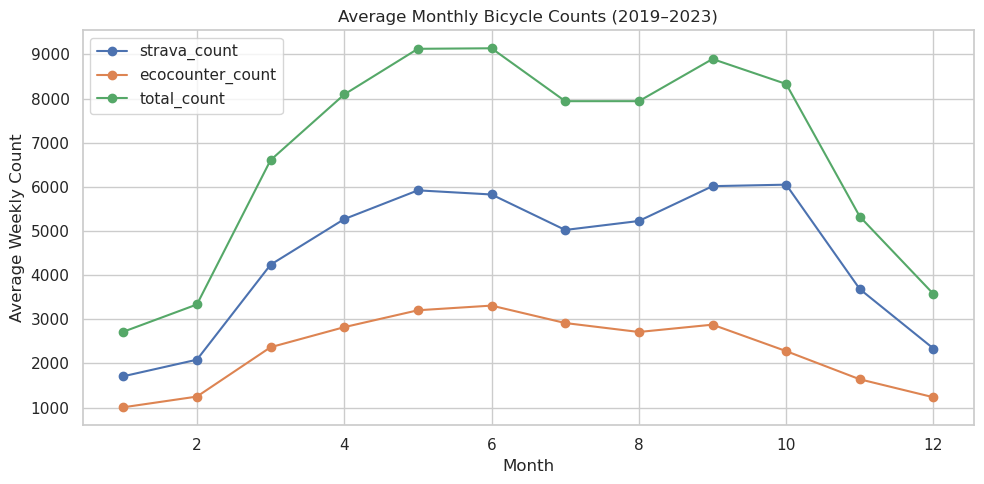

Interactive map saved: spatial_clusters_map.html

Regression by Season:


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by LinearRegression.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- Load Data ---
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# --- Rename columns ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- Convert slope category to numeric ---
df['MAX_slopePct'] = df['MAX_slopePct'].astype(str).str.replace('–', '-', regex=False).str.strip()
slope_bins = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].replace(slope_bins)
df['MAX_slopePct'] = pd.to_numeric(df['MAX_slopePct'], errors='coerce')

# --- Convert other covariates to numeric ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- Drop rows with missing predictor or target ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

# --- Regression (All Data) ---
if not df_model.empty:
    X = df_model[features]
    y = df_model['ecocounter_count']
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    print("Multivariate Regression Results (All Data):")
    print(f"  R² Score: {r2_score(y, y_pred):.3f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y, y_pred)):.2f}")
    print("  Coefficients:")
    for feat, coef in zip(features, model.coef_):
        print(f"    {feat}: {coef:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")
else:
    print("No valid rows for modeling after cleaning.")

# --- Seasonal Breakdown Plot ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()

monthly_avg.plot(marker='o', figsize=(10, 5))
plt.title('Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Spatial Clustering ---
df_grid = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()
kmeans = KMeans(n_clusters=3, random_state=42)
df_grid['cluster'] = kmeans.fit_predict(df_grid[['strava_count', 'ecocounter_count']])
df_grid['lat'] = 36.3 + (np.arange(len(df_grid)) % 20) * 0.01
df_grid['lon'] = -94.3 + (np.arange(len(df_grid)) // 20) * 0.01

m = folium.Map(location=[36.37, -94.21], zoom_start=10)
for _, row in df_grid.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['total_count'] / 5000,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=(f"GRID: {row['GRID_ID']}<br>"
               f"Strava: {row['strava_count']:.0f}<br>"
               f"EcoCounter: {row['ecocounter_count']:.0f}<br>"
               f"Cluster: {row['cluster']}")
    ).add_to(m)
m.save('../processed_data/spatial_clusters_map.html')
print("Interactive map saved: spatial_clusters_map.html")

# --- Regression by Season ---
df['season'] = df['week_start'].dt.month % 12 // 3 + 1
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season'] = df['season'].map(season_map)

print("\nRegression by Season:")
for season, group in df.groupby('season'):
    group_model = group.dropna(subset=features + ['ecocounter_count'])
    if len(group_model) > 10:
        X_s = group_model[features]
        y_s = group_model['ecocounter_count']
        m_s = LinearRegression().fit(X_s, y_s)
        y_pred_s = m_s.predict(X_s)
        print(f"  {season}: R² = {r2_score(y_s, y_pred_s):.3f}, RMSE = {np.sqrt(mean_squared_error(y_s, y_pred_s)):.1f}")

# --- Residuals by Cluster ---
df_residuals = df_model.copy()
df_residuals['y_true'] = df_residuals['ecocounter_count']
df_residuals['y_pred'] = model.predict(df_model[features])
df_residuals['residual'] = df_residuals['y_true'] - df_residuals['y_pred']
df_residuals = df_residuals.merge(df_grid[['GRID_ID', 'cluster']], on='GRID_ID', how='left')

plt.figure(figsize=(10, 5))
for cluster in sorted(df_residuals['cluster'].dropna().unique()):
    cluster_df = df_residuals[df_residuals['cluster'] == cluster]
    plt.scatter(cluster_df['y_true'], cluster_df['residual'], label=f'Cluster {cluster}', alpha=0.6)

plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals by Cluster')
plt.xlabel('Observed EcoCounter Count')
plt.ylabel('Residual (Observed - Predicted)')
plt.legend()
plt.tight_layout()
plt.show()

# --- Save cleaned file ---
df.to_csv('../processed_data/df_cleaned.csv', index=False)
print("Cleaned dataset saved as df_cleaned.csv")

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

# --- 📁 Load Data ---
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# --- ✅ Rename for simplicity ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🧹 Clean and Convert Slope Category to Numeric Midpoint ---
df['MAX_slopePct'] = df['MAX_slopePct'].astype(str).str.replace('–', '-', regex=False).str.strip()

slope_bins = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].replace(slope_bins)
df['MAX_slopePct'] = pd.to_numeric(df['MAX_slopePct'], errors='coerce')

# --- 🔢 Convert Other Covariates ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- 🔧 Impute missing slope values ---
df['MAX_slopePct'] = df['MAX_slopePct'].fillna(df['MAX_slopePct'].median())

# --- 🧠 Multivariate Regression ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

X = df_model[features]
y = df_model['ecocounter_count']

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

print("\n🔢 Multivariate Regression Results:")
print(f"  R² Score: {r2_score(y, y_pred):.3f}")
print(f"  RMSE: {mean_squared_error(y, y_pred, squared=False):.2f}")
print("  Coefficients:")
for feat, coef in zip(features, model.coef_):
    print(f"    {feat}: {coef:.2f}")
print(f"  Intercept: {model.intercept_:.2f}")

# --- 📈 Seasonal Breakdown ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()

monthly_avg.plot(marker='o', figsize=(10, 5))
plt.title('📆 Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 🌍 Spatial Clustering & Mapping ---
df_grid = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()

kmeans = KMeans(n_clusters=3, random_state=42)
df_grid['cluster'] = kmeans.fit_predict(df_grid[['strava_count', 'ecocounter_count']])

# Assign mock coordinates (for example only)
df_grid['lat'] = 36.3 + (np.arange(len(df_grid)) % 20) * 0.01
df_grid['lon'] = -94.3 + (np.arange(len(df_grid)) // 20) * 0.01

m = folium.Map(location=[36.37, -94.21], zoom_start=10)
for _, row in df_grid.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['total_count'] / 5000,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=(f"GRID: {row['GRID_ID']}<br>"
               f"Strava: {row['strava_count']:.0f}<br>"
               f"EcoCounter: {row['ecocounter_count']:.0f}<br>"
               f"Cluster: {row['cluster']}")
    ).add_to(m)

m.save('../processed_data/spatial_clusters_map.html')
print("\n🗺️ Interactive map saved: spatial_clusters_map.html")

# --- 💾 Save Cleaned Data ---
df.to_csv('../processed_data/df_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as df_cleaned.csv")

/srv/conda/envs/notebook/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by LinearRegression.


✅ Rows available for modeling: 0
❓ Missing values before modeling:
 strava_count                       0
MAX_slopePct                    3377
2024 Median Household Income       0
2024 Diversity Index               0
ecocounter_count                   0
dtype: int64
🚫 No valid rows for modeling after cleaning.


/srv/conda/envs/notebook/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_339/3863056507.py:75: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


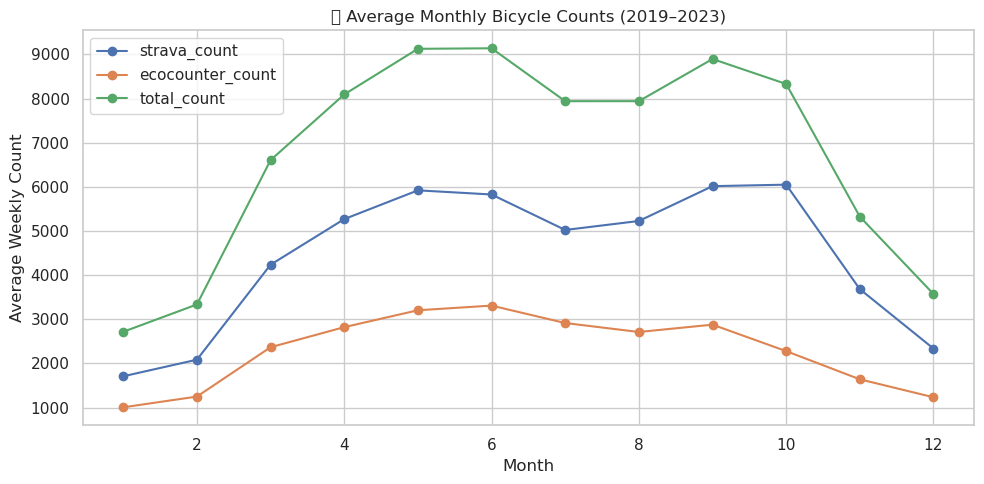


🗺️ Interactive map saved: spatial_clusters_map.html

📊 Regression by Season:
  Fall: Not enough data.
  Spring: Not enough data.
  Summer: Not enough data.
  Winter: Not enough data.


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by LinearRegression.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

# --- 📁 Load Data ---
df = pd.read_csv('../processed_data/weekly_with_covariates.csv', parse_dates=['week_start'])

# --- ✅ Rename for simplicity ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🧹 Clean and Convert Slope Category to Numeric Midpoint ---
df['MAX_slopePct'] = df['MAX_slopePct'].astype(str).str.replace('–', '-', regex=False).str.strip()

slope_bins = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].replace(slope_bins)
df['MAX_slopePct'] = pd.to_numeric(df['MAX_slopePct'], errors='coerce')

# --- 🔢 Convert Other Covariates ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- 🔧 Impute missing slope values before modeling ---
df['MAX_slopePct'] = df['MAX_slopePct'].fillna(df['MAX_slopePct'].median())

# --- 🔠 Feature setup ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

print(f"\n✅ Rows available for modeling: {len(df_model)}")
print("❓ Missing values before modeling:\n", df[features + ['ecocounter_count']].isna().sum())

# --- 🧠 Multivariate Regression ---
if not df_model.empty:
    X = df_model[features]
    y = df_model['ecocounter_count']
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    print("\n🔢 Multivariate Regression Results:")
    print(f"  R² Score: {r2_score(y, y_pred):.3f}")
    print(f"  RMSE: {mean_squared_error(y, y_pred, squared=False):.2f}")
    print("  Coefficients:")
    for feat, coef in zip(features, model.coef_):
        print(f"    {feat}: {coef:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")
else:
    print("🚫 No valid rows for modeling after cleaning.")

# --- 📈 Seasonal Breakdown ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()

monthly_avg.plot(marker='o', figsize=(10, 5))
plt.title('📆 Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 🌍 Spatial Clustering & Mapping ---
df_grid = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()

kmeans = KMeans(n_clusters=3, random_state=42)
df_grid['cluster'] = kmeans.fit_predict(df_grid[['strava_count', 'ecocounter_count']])

# Assign mock coordinates (for demo only)
df_grid['lat'] = 36.3 + (np.arange(len(df_grid)) % 20) * 0.01
df_grid['lon'] = -94.3 + (np.arange(len(df_grid)) // 20) * 0.01

m = folium.Map(location=[36.37, -94.21], zoom_start=10)
for _, row in df_grid.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['total_count'] / 5000,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=(f"GRID: {row['GRID_ID']}<br>"
               f"Strava: {row['strava_count']:.0f}<br>"
               f"EcoCounter: {row['ecocounter_count']:.0f}<br>"
               f"Cluster: {row['cluster']}")
    ).add_to(m)

m.save('../processed_data/spatial_clusters_map.html')
print("\n🗺️ Interactive map saved: spatial_clusters_map.html")

# --- 📊 Regression by Season ---
df['season'] = df['week_start'].dt.month % 12 // 3 + 1
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season'] = df['season'].map(season_map)

print("\n📊 Regression by Season:")
for season, group in df.groupby('season'):
    group_model = group.dropna(subset=features + ['ecocounter_count'])
    if len(group_model) > 10:
        X_s = group_model[features]
        y_s = group_model['ecocounter_count']
        m_s = LinearRegression().fit(X_s, y_s)
        y_pred_s = m_s.predict(X_s)
        print(f"  {season}: R² = {r2_score(y_s, y_pred_s):.3f}, RMSE = {mean_squared_error(y_s, y_pred_s, squared=False):.1f}")
    else:
        print(f"  {season}: Not enough data.")

# --- 📉 Residuals by Cluster ---
df_residuals = df_model.copy()
df_residuals['y_true'] = df_residuals['ecocounter_count']
df_residuals['y_pred'] = model.predict(df_model[features])
df_residuals['residual'] = df_residuals['y_true'] - df_residuals['y_pred']
df_residuals = df_residuals.merge(df_grid[['GRID_ID', 'cluster']], on='GRID_ID', how='left')

plt.figure(figsize=(10, 5))
for cluster in sorted(df_residuals['cluster'].dropna().unique()):
    cluster_df = df_residuals[df_residuals['cluster'] == cluster]
    plt.scatter(cluster_df['y_true'], cluster_df['residual'], label=f'Cluster {cluster}', alpha=0.6)

plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals by Cluster')
plt.xlabel('Observed EcoCounter Count')
plt.ylabel('Residual (Observed - Predicted)')
plt.legend()
plt.tight_layout()
plt.show()

# --- 💾 Save Cleaned Data ---
df.to_csv('../processed_data/df_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as df_cleaned.csv")


🚫 No valid rows for regression after cleaning.


/srv/conda/envs/notebook/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_339/531533849.py:75: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/srv/conda/envs/notebook/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


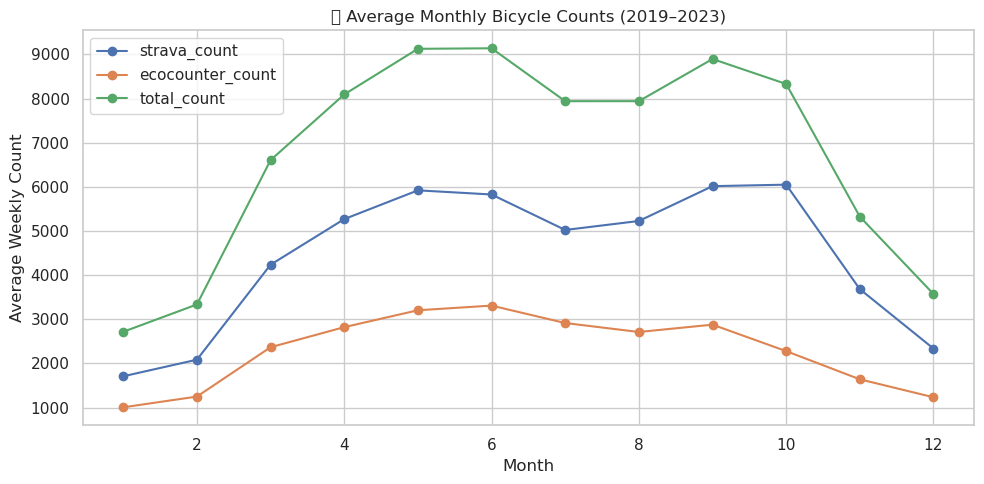

🗺️ Interactive map saved: spatial_clusters_map.html

📊 Regression by Season:
  Fall: Not enough data.
  Spring: Not enough data.
  Summer: Not enough data.
  Winter: Not enough data.
✅ Cleaned dataset saved as df_cleaned.csv


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.cluster import KMeans

# --- 📁 Load Data (Update the full path below) ---
df = pd.read_csv(
    '/home/jovyan/BiasCorrectionCrowdsourcedData-cookbook/processed_data/weekly_with_covariates.csv',
    parse_dates=['week_start']
)

# --- ✅ Rename for simplicity ---
df = df.rename(columns={
    'SUM_total_trip_count': 'strava_count',
    'EcoCntr_weekly_SUM': 'ecocounter_count'
})
df['total_count'] = df['strava_count'] + df['ecocounter_count']

# --- 🧹 Clean and Convert Slope Category to Numeric Midpoint ---
df['MAX_slopePct'] = df['MAX_slopePct'].astype(str).str.replace('–', '-', regex=False).str.strip()

slope_bins = {
    '0 to 1%': 0.5,
    '1 to 3%': 2.0,
    '3 to 6%': 4.5,
    '6 to 8%': 7.0,
    '8 to 12%': 10.0,
    '12 to 25%': 18.5,
    'Above 25%': 30.0
}
df['MAX_slopePct'] = df['MAX_slopePct'].replace(slope_bins)
df['MAX_slopePct'] = pd.to_numeric(df['MAX_slopePct'], errors='coerce')

# --- 🔢 Convert Other Covariates ---
df['2024 Median Household Income'] = pd.to_numeric(df['2024 Median Household Income'], errors='coerce')
df['2024 Diversity Index'] = pd.to_numeric(df['2024 Diversity Index'], errors='coerce')

# --- 🔧 Impute missing slope values ---
df['MAX_slopePct'] = df['MAX_slopePct'].fillna(df['MAX_slopePct'].median())

# --- 🧠 Multivariate Regression ---
features = ['strava_count', 'MAX_slopePct', '2024 Median Household Income', '2024 Diversity Index']
df_model = df.dropna(subset=features + ['ecocounter_count'])

if not df_model.empty:
    X = df_model[features]
    y = df_model['ecocounter_count']

    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)

    print("\n🔢 Multivariate Regression Results:")
    print(f"  R² Score: {r2_score(y, y_pred):.3f}")
    print(f"  RMSE: {mean_squared_error(y, y_pred, squared=False):.2f}")
    print("  Coefficients:")
    for feat, coef in zip(features, model.coef_):
        print(f"    {feat}: {coef:.2f}")
    print(f"  Intercept: {model.intercept_:.2f}")
else:
    print("🚫 No valid rows for regression after cleaning.")

# --- 📆 Seasonal Breakdown ---
df['month'] = df['week_start'].dt.month
monthly_avg = df.groupby('month')[['strava_count', 'ecocounter_count', 'total_count']].mean()

monthly_avg.plot(marker='o', figsize=(10, 5))
plt.title('📆 Average Monthly Bicycle Counts (2019–2023)')
plt.ylabel('Average Weekly Count')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 🌍 Spatial Clustering ---
df_grid = df.groupby('GRID_ID')[['strava_count', 'ecocounter_count', 'total_count']].mean().reset_index()

kmeans = KMeans(n_clusters=3, random_state=42)
df_grid['cluster'] = kmeans.fit_predict(df_grid[['strava_count', 'ecocounter_count']])

# Assign mock coordinates
df_grid['lat'] = 36.3 + (np.arange(len(df_grid)) % 20) * 0.01
df_grid['lon'] = -94.3 + (np.arange(len(df_grid)) // 20) * 0.01

# Interactive map
m = folium.Map(location=[36.37, -94.21], zoom_start=10)
for _, row in df_grid.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['total_count'] / 5000,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=(f"GRID: {row['GRID_ID']}<br>"
               f"Strava: {row['strava_count']:.0f}<br>"
               f"EcoCounter: {row['ecocounter_count']:.0f}<br>"
               f"Cluster: {row['cluster']}")
    ).add_to(m)

m.save('/home/jovyan/BiasCorrectionCrowdsourcedData-cookbook/processed_data/spatial_clusters_map.html')
print("🗺️ Interactive map saved: spatial_clusters_map.html")

# --- 📊 Regression by Season ---
df['season'] = df['week_start'].dt.month % 12 // 3 + 1
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['season'] = df['season'].map(season_map)

print("\n📊 Regression by Season:")
for season, group in df.groupby('season'):
    group_model = group.dropna(subset=features + ['ecocounter_count'])
    if len(group_model) > 10:
        X_s = group_model[features]
        y_s = group_model['ecocounter_count']
        m_s = LinearRegression().fit(X_s, y_s)
        y_pred_s = m_s.predict(X_s)
        print(f"  {season}: R² = {r2_score(y_s, y_pred_s):.3f}, RMSE = {np.sqrt(mean_squared_error(y_s, y_pred_s)):.1f}")
    else:
        print(f"  {season}: Not enough data.")

# --- 📉 Residuals by Cluster ---
if not df_model.empty:
    df_residuals = df_model.copy()
    df_residuals['y_true'] = df_residuals['ecocounter_count']
    df_residuals['y_pred'] = model.predict(df_model[features])
    df_residuals['residual'] = df_residuals['y_true'] - df_residuals['y_pred']
    df_residuals = df_residuals.merge(df_grid[['GRID_ID', 'cluster']], on='GRID_ID', how='left')

    plt.figure(figsize=(10, 5))
    for cluster in sorted(df_residuals['cluster'].dropna().unique()):
        cluster_df = df_residuals[df_residuals['cluster'] == cluster]
        plt.scatter(cluster_df['y_true'], cluster_df['residual'], label=f'Cluster {cluster}', alpha=0.6)

    plt.axhline(0, color='gray', linestyle='--')
    plt.title('Residuals by Cluster')
    plt.xlabel('Observed EcoCounter Count')
    plt.ylabel('Residual (Observed - Predicted)')
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- 💾 Save Cleaned Data ---
df.to_csv('/home/jovyan/BiasCorrectionCrowdsourcedData-cookbook/processed_data/df_cleaned.csv', index=False)
print("✅ Cleaned dataset saved as df_cleaned.csv")
